## Temperature Forecast Project using ML

##### By  Mr Gaurav Kumar

#### Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


### import libraries

In [1]:
import pandas as pd,seaborn as sns,matplotlib.pyplot as plt,numpy as np

In [2]:
df=pd.read_csv("temperature.csv")

In [3]:
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

as we can see that there is 7752 rows and 25 columns 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


this dataset contains maximun of float datatypes

In [5]:
# check for the null values in the dataset checking column wise null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [6]:
# checking total null values
df.isnull().sum().sum()

1248

In [7]:
# checking the percentage of the null values

null=df.isnull().sum()
percnt=(null/len(df))*100
df_types=df.dtypes

print(pd.concat([null,percnt,df.dtypes], axis =1, keys =['Missing Values', '% Missing data','datatypes']))

                  Missing Values  % Missing data datatypes
station                        2        0.025800   float64
Date                           2        0.025800    object
Present_Tmax                  70        0.902993   float64
Present_Tmin                  70        0.902993   float64
LDAPS_RHmin                   75        0.967492   float64
LDAPS_RHmax                   75        0.967492   float64
LDAPS_Tmax_lapse              75        0.967492   float64
LDAPS_Tmin_lapse              75        0.967492   float64
LDAPS_WS                      75        0.967492   float64
LDAPS_LH                      75        0.967492   float64
LDAPS_CC1                     75        0.967492   float64
LDAPS_CC2                     75        0.967492   float64
LDAPS_CC3                     75        0.967492   float64
LDAPS_CC4                     75        0.967492   float64
LDAPS_PPT1                    75        0.967492   float64
LDAPS_PPT2                    75        0.967492   float

we can drop these missing values because it is very less so its doesnt affect our prediction 

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(7588, 25)

In [10]:
# data integrity check

df.duplicated().sum()

0

0% duplicate data

In [11]:
df.isin(['NA'," ","_","-",'NaN']).sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [12]:
df.shape

(7588, 25)

<AxesSubplot:>

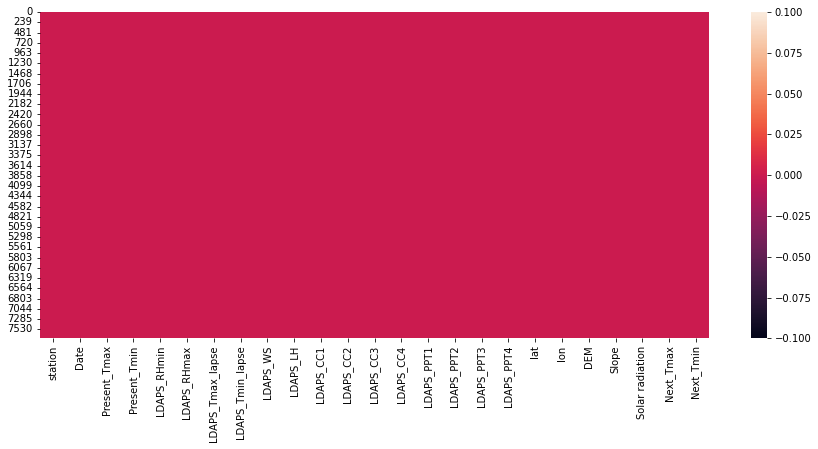

In [13]:
# plt heatmatp to see misisng values 
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull())

as we can see the data set is neatly cleaned

In [14]:
# we can move further to next steps

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


In [16]:
# Converting Date datatypes and spliting date into date, month and year.
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)


C:\Users\GauRav SingH\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30-06-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\GauRav SingH\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-07-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\GauRav SingH\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-07-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\GauRav SingH\AppData\Local\Programs\Pyth

In [17]:
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887   69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890   51.937448  ...  37.6046   
2         30.091292         24.565633  6.138224   20.573050  ...  37.5776   
3         29.704629         23.326177  5.650050   65.727144  ...  37.6450   
4         29.113934         23.486480  5.735004  107.965535  ...  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  Day  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2   30   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5   30   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9   30   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3   30   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5   30   

   Month  Year  
0      6  2013  
1      6  2013  
2      6  2013  
3      6  2013  
4      6  2013  

[5 rows x 28 columns]

In [18]:
# now we can drop date coluum because extraction is done 
df.drop('Date',inplace=True,axis=1)

In [19]:
pd.set_option('display.max_columns', None)
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  
0       21.2   30      6  2013  
1       22.5   30      6  2013  
2       23.9   30      6  2013  
3       24.3   30      6  2013  
4       22.5   30      6  2013

#### ploting the chart for better insight

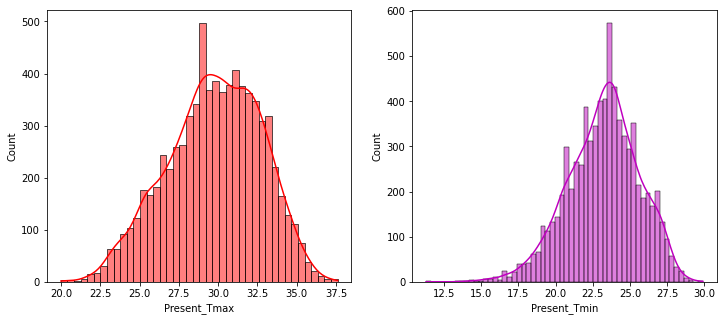

In [20]:
# Plotting histogram for present_Tmax and present_Tmin variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color='m')
plt.show()

as we can see that the minimum temeprate varies from 12 to 30 and maximum temeprature varies from 20 to 37

In [21]:
# check for the maximum and minimum temperature from 2013 to 2017



In [22]:
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  
0       21.2   30      6  2013  
1       22.5   30      6  2013  
2       23.9   30      6  2013  
3       24.3   30      6  2013  
4       22.5   30      6  2013

In [23]:
print("the maximum temperature from 2013 to 2017 is ",df['Present_Tmax'].max())
print("the minimum temperature from 2013 to 2017 is ",df['Present_Tmax'].min())
print("\n")
print("*"*100)
print("\n")
print("the maximum temperature from 2013 to 2017 is ",df['Present_Tmin'].max())
print("the minimum temperature from 2013 to 2017 is ",df['Present_Tmin'].min())

the maximum temperature from 2013 to 2017 is  37.6
the minimum temperature from 2013 to 2017 is  20.0


****************************************************************************************************


the maximum temperature from 2013 to 2017 is  29.9
the minimum temperature from 2013 to 2017 is  11.3


In [24]:
# now we can check on which year and station having these maximum and minimum temeprature so we can use iloc approach

In [25]:
df.loc[df.Present_Tmax==df.Present_Tmax.max()]

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
5717     18.0          37.6          26.8    44.254253    87.745514   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
5717         34.794021         27.150764  6.366598  111.225118   0.218892   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
5717   0.094288   0.004283   0.000343         0.0         0.0         0.0   

      LDAPS_PPT4      lat      lon      DEM   Slope  Solar radiation  \
5717         0.0  37.4832  127.024  56.4448  1.2313      5082.563477   

      Next_Tmax  Next_Tmin  Day  Month  Year  
5717       37.0       27.8    8     11  2016

In [26]:
df.loc[df.Present_Tmax==df.Present_Tmax.min()]

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7725      1.0          20.0          15.1    35.652172     89.97319   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
7725         24.323737         16.128899  7.087329  108.981108   0.046182   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
7725   0.014955        0.0    0.00063         0.0         0.0         0.0   

      LDAPS_PPT4      lat      lon      DEM  Slope  Solar radiation  \
7725         0.0  37.6046  126.991  212.335  2.785       4614.76123   

      Next_Tmax  Next_Tmin  Day  Month  Year  
7725       23.8       15.1   30      8  2017

In [27]:
df.loc[df.Present_Tmin==df.Present_Tmin.max()]

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
2397     23.0          35.3          29.9    53.946949    85.985161   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
2397         30.912804         25.439537  13.011129  117.837212   0.684685   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
2397   0.448827   0.762858   0.635728    1.670126    0.005681    0.248885   

      LDAPS_PPT4      lat      lon      DEM   Slope  Solar radiation  \
2397    0.003176  37.5372  126.891  15.5876  0.1554      5360.226563   

      Next_Tmax  Next_Tmin  Day  Month  Year  
2397       31.3       24.8    8      2  2014

In [28]:
df.loc[df.Present_Tmin==df.Present_Tmin.min()]

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
6116     17.0          27.1          11.3    62.793823    91.726936   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
6116         23.529546         17.963487  7.984566  84.48145   0.668264   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
6116   0.410536   0.452879   0.627238    0.181458         0.0    0.405181   

      LDAPS_PPT4      lat      lon      DEM  Slope  Solar radiation  \
6116    1.015573  37.6181  127.099  53.4712  0.697      4539.616699   

      Next_Tmax  Next_Tmin  Day  Month  Year  
6116       24.6       17.1   27      8  2016

from the above result we can observe that

1) at station 18 the present_tmax having the maximum temerature at 2016 year

2) at station 1 the present_tmax having the minimum temerature at 2017 year

3) at station 23 the present_tmin having the maximum temerature at 2014 year

4) at station 17 the present_tmin having the minimum temerature at 2016 year

In [29]:
df.describe().T

count         mean         std          min          25%  \
station           7588.0    13.014101    7.217858     1.000000     7.000000   
Present_Tmax      7588.0    29.748366    2.967401    20.000000    27.800000   
Present_Tmin      7588.0    23.195809    2.400880    11.300000    21.600000   
LDAPS_RHmin       7588.0    56.724969   14.626559    19.794666    45.960243   
LDAPS_RHmax       7588.0    88.360823    7.199456    58.936283    84.203724   
LDAPS_Tmax_lapse  7588.0    29.620128    2.943496    17.624954    27.673756   
LDAPS_Tmin_lapse  7588.0    23.511786    2.342579    14.272646    22.086820   
LDAPS_WS          7588.0     7.094097    2.177034     2.882580     5.675358   
LDAPS_LH          7588.0    62.492606   33.686158   -13.603212    37.206201   
LDAPS_CC1         7588.0     0.368510    0.262260     0.000000     0.146546   
LDAPS_CC2         7588.0     0.355528    0.257922     0.000000     0.140324   
LDAPS_CC3         7588.0     0.317546    0.249833     0.000000     0.100950   
LDAPS_CC4         7588.0     0.298268    0.253392     0.000000     0.081495   
LDAPS_PPT1        7588.0     0.589008    1.927577     0.000000     0.000000   
LDAPS_PPT2        7588.0     0.480738    1.743327     0.000000     0.000000   
LDAPS_PPT3        7588.0     0.275007    1.146087     0.000000     0.000000   
LDAPS_PPT4        7588.0     0.265373    1.179661     0.000000     0.000000   
lat               7588.0    37.544792    0.050428    37.456200    37.510200   
lon               7588.0   126.991420    0.079220   126.826000   126.937000   
DEM               7588.0    61.918136   54.323529    12.370000    28.700000   
Slope             7588.0     1.259755    1.372748     0.098500     0.271300   
Solar radiation   7588.0  5343.724208  429.782561  4329.520508  5001.485717   
Next_Tmax         7588.0    30.241526    3.111807    17.400000    28.200000   
Next_Tmin         7588.0    22.910820    2.482256    11.300000    21.300000   
Day               7588.0    16.337375    8.216880     7.000000     8.000000   
Month             7588.0     7.068134    2.242389     1.000000     7.000000   
Year              7588.0  2014.991697    1.410877  2013.000000  2014.000000   

                          50%          75%          max  
station             13.000000    19.000000    25.000000  
Present_Tmax        29.900000    32.000000    37.600000  
Present_Tmin        23.400000    24.800000    29.900000  
LDAPS_RHmin         55.023199    67.115099    98.524734  
LDAPS_RHmax         89.784122    93.742725   100.000153  
LDAPS_Tmax_lapse    29.709537    31.711109    38.542255  
LDAPS_Tmin_lapse    23.758249    25.155660    29.619342  
LDAPS_WS             6.547838     8.028960    21.857621  
LDAPS_LH            56.898324    84.235666   213.414006  
LDAPS_CC1            0.315706     0.574174     0.967277  
LDAPS_CC2            0.311676     0.557164     0.968353  
LDAPS_CC3            0.261795     0.496444     0.983789  
LDAPS_CC4            0.227459     0.498127     0.974710  
LDAPS_PPT1           0.000000     0.052594    23.701544  
LDAPS_PPT2           0.000000     0.017735    21.621661  
LDAPS_PPT3           0.000000     0.007855    15.841235  
LDAPS_PPT4           0.000000     0.000017    16.655469  
lat                 37.550700    37.577600    37.645000  
lon                126.995000   127.042000   127.135000  
DEM                 45.716000    59.832400   212.335000  
Slope                0.618000     1.767800     5.178200  
Solar radiation   5441.987305  5729.485840  5992.895996  
Next_Tmax           30.400000    32.600000    38.900000  
Next_Tmin           23.100000    24.600000    29.800000  
Day                 16.000000    24.000000    31.000000  
Month                7.000000     8.000000    12.000000  
Year              2015.000000  2016.000000  2017.000000

as we cann see that the count column having the same number of data present means there is no missing value

in some columns there is mean slighter higher and in some columns there is slightly higher medain so the data is little bit skewed we can check further 

    

In [30]:
df.head(2)

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887  69.451805   0.233947   
1         29.850689         24.035009  5.691890  51.937448   0.225508   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   

   Next_Tmin  Day  Month  Year  
0       21.2   30      6  2013  
1       22.5   30      6  2013

Text(0, 0.5, 'Present_Tmax')

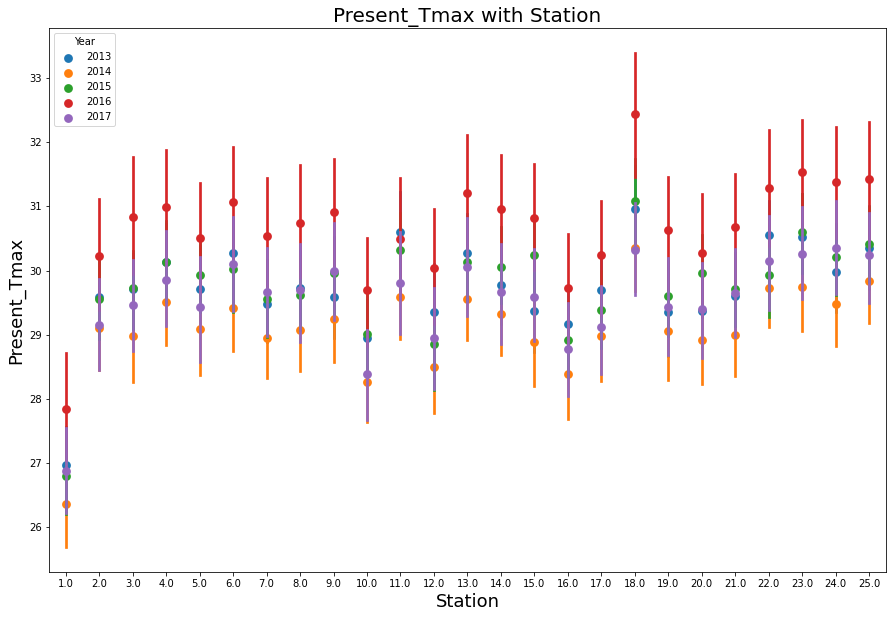

In [31]:
# ploting the Station with PresentTmax and then PresetTmin
plt.figure(figsize=(15,10))
sns.pointplot(x='station',y='Present_Tmax',data=df,hue='Year',join=False)
plt.title("Present_Tmax with Station",fontsize=20)
plt.xlabel('Station',fontsize=18)
plt.ylabel('Present_Tmax',fontsize=18)

as we can see year 2016 habing the maximum temp on station 18 and minimum temp on station 1

as we can see that 2016 having the hotest one and 2014 having the coldest

Text(0, 0.5, 'Present_Tmin')

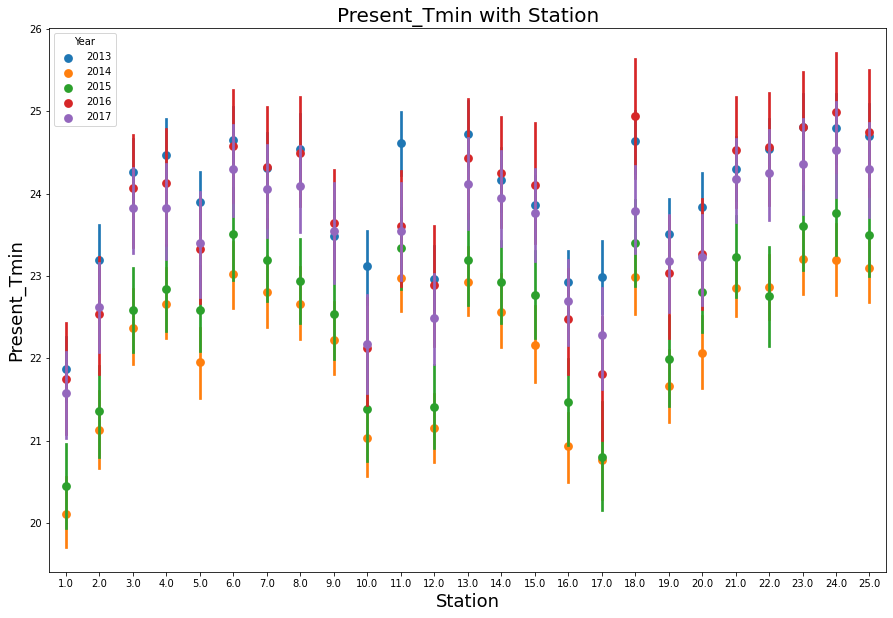

In [32]:
# lets plot the same graph with the Present_Tmin

plt.figure(figsize=(15,10))
sns.pointplot(x='station',y='Present_Tmin',data=df,hue='Year',join=False)
plt.title("Present_Tmin with Station",fontsize=20)
plt.xlabel('Station',fontsize=18)
plt.ylabel('Present_Tmin',fontsize=18)

In [33]:
df.head(2)

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887  69.451805   0.233947   
1         29.850689         24.035009  5.691890  51.937448   0.225508   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   

   Next_Tmin  Day  Month  Year  
0       21.2   30      6  2013  
1       22.5   30      6  2013

#### model forcast with present day Tmax ,next day LDAPS_RHmax and present day Tmin with next day LDAPS_RHMin

<AxesSubplot:title={'center':'relative humidity'}, xlabel='Present_Tmin', ylabel='LDAPS_RHmin'>

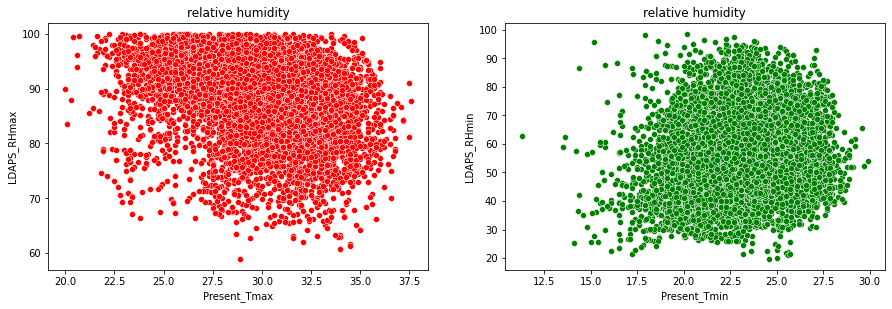

In [34]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title("relative humidity")
sns.scatterplot(x='Present_Tmax',y='LDAPS_RHmax',data=df,color='red')

plt.subplot(2,2,2)
plt.title("relative humidity")
sns.scatterplot(x='Present_Tmin',y='LDAPS_RHmin',data=df,color='green')


#### model forecast of next-day maximum air temperature and same for the minimum with the present day tmax and min

In [35]:
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  
0       21.2   30      6  2013  
1       22.5   30      6  2013  
2       23.9   30      6  2013  
3       24.3   30      6  2013  
4       22.5   30      6  2013

<AxesSubplot:title={'center':'minimum air temp'}, xlabel='Present_Tmin', ylabel='LDAPS_Tmin_lapse'>

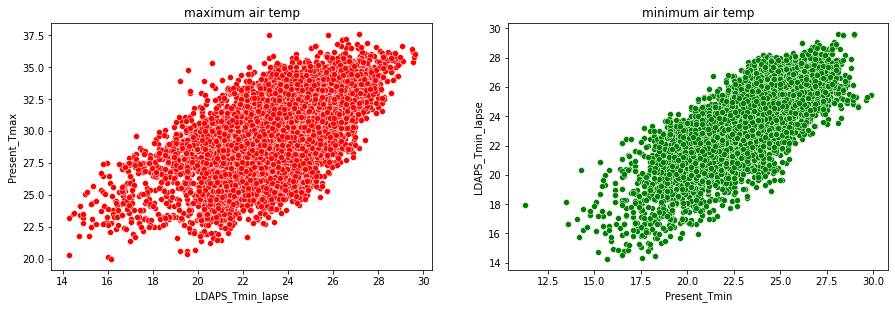

In [36]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title("maximum air temp")
sns.scatterplot(x='LDAPS_Tmin_lapse',y='Present_Tmax',data=df,color='red')

plt.subplot(2,2,2)
plt.title("minimum air temp")
sns.scatterplot(y='LDAPS_Tmin_lapse',x='Present_Tmin',data=df,color='green')


### present day max Temperature Vs Next-day 1st to 4th( 6-hour cloud cover)

<AxesSubplot:title={'center':'present day max Temperature Vs Next-day 4st 6-hour cloud cover'}, xlabel='Present_Tmax', ylabel='LDAPS_CC4'>

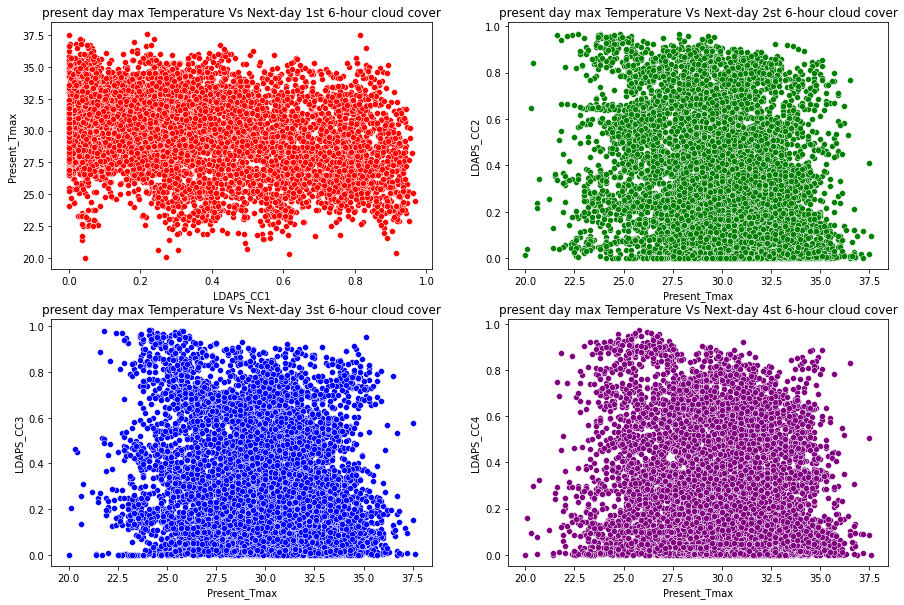

In [37]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title("present day max Temperature Vs Next-day 1st 6-hour cloud cover")
sns.scatterplot(x='LDAPS_CC1',y='Present_Tmax',data=df,color='red')

plt.subplot(2,2,2)
plt.title("present day max Temperature Vs Next-day 2st 6-hour cloud cover")
sns.scatterplot(y='LDAPS_CC2',x='Present_Tmax',data=df,color='green')

plt.subplot(2,2,3)
plt.title("present day max Temperature Vs Next-day 3st 6-hour cloud cover")
sns.scatterplot(y='LDAPS_CC3',x='Present_Tmax',data=df,color='blue')

plt.subplot(2,2,4)
plt.title("present day max Temperature Vs Next-day 4st 6-hour cloud cover")
sns.scatterplot(y='LDAPS_CC4',x='Present_Tmax',data=df,color='purple')


### present day min Temperature Vs Next-day 1st to 4th( 6-hour cloud cover)

<AxesSubplot:title={'center':'present day max Temperature Vs Next-day 4st 6-hour cloud cover'}, xlabel='Present_Tmin', ylabel='LDAPS_CC4'>

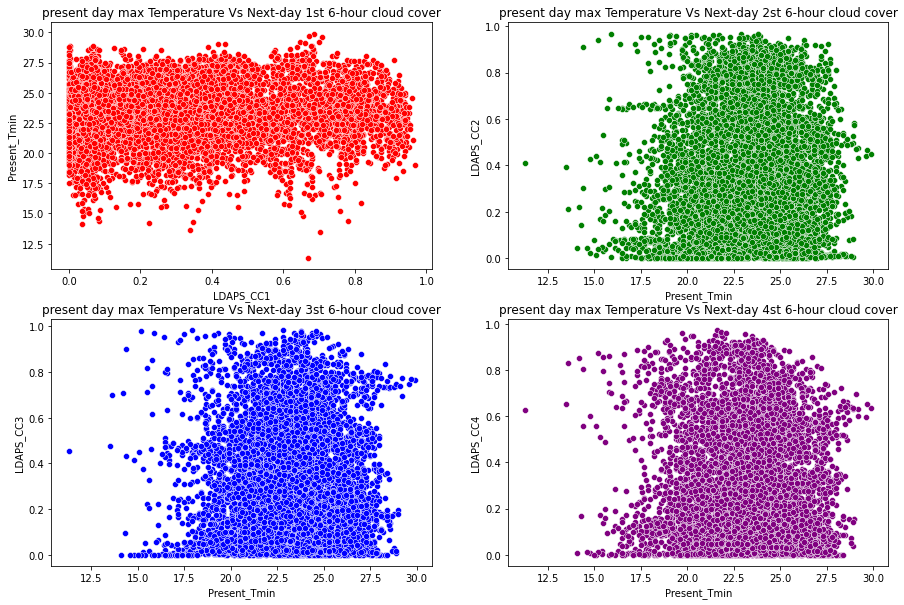

In [38]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title("present day max Temperature Vs Next-day 1st 6-hour cloud cover")
sns.scatterplot(x='LDAPS_CC1',y='Present_Tmin',data=df,color='red')

plt.subplot(2,2,2)
plt.title("present day max Temperature Vs Next-day 2st 6-hour cloud cover")
sns.scatterplot(y='LDAPS_CC2',x='Present_Tmin',data=df,color='green')

plt.subplot(2,2,3)
plt.title("present day max Temperature Vs Next-day 3st 6-hour cloud cover")
sns.scatterplot(y='LDAPS_CC3',x='Present_Tmin',data=df,color='blue')

plt.subplot(2,2,4)
plt.title("present day max Temperature Vs Next-day 4st 6-hour cloud cover")
sns.scatterplot(y='LDAPS_CC4',x='Present_Tmin',data=df,color='purple')

In [39]:
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  
0       21.2   30      6  2013  
1       22.5   30      6  2013  
2       23.9   30      6  2013  
3       24.3   30      6  2013  
4       22.5   30      6  2013

<AxesSubplot:title={'center':'present day min Temperature Vs solar radiation'}, xlabel='Solar radiation', ylabel='Present_Tmin'>

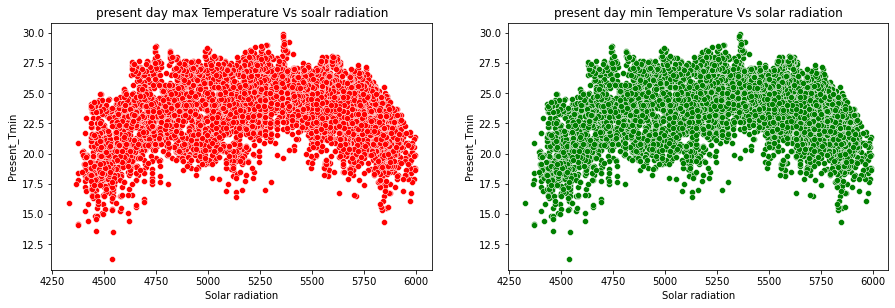

In [40]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title("present day max Temperature Vs soalr radiation")
sns.scatterplot(x='Solar radiation',y='Present_Tmin',data=df,color='red')

plt.subplot(2,2,2)
plt.title("present day min Temperature Vs solar radiation")
sns.scatterplot(x='Solar radiation',y='Present_Tmin',data=df,color='green')



as we can see that temp_min the solar radiation ranges more in 17.5 to 27.5

and in temp_min same as max 

In [41]:
df.head(2)

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887  69.451805   0.233947   
1         29.850689         24.035009  5.691890  51.937448   0.225508   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   

   Next_Tmin  Day  Month  Year  
0       21.2   30      6  2013  
1       22.5   30      6  2013

### now we can plot the data points with the next tmax and next tmin

<AxesSubplot:xlabel='Next_Tmin', ylabel='Count'>

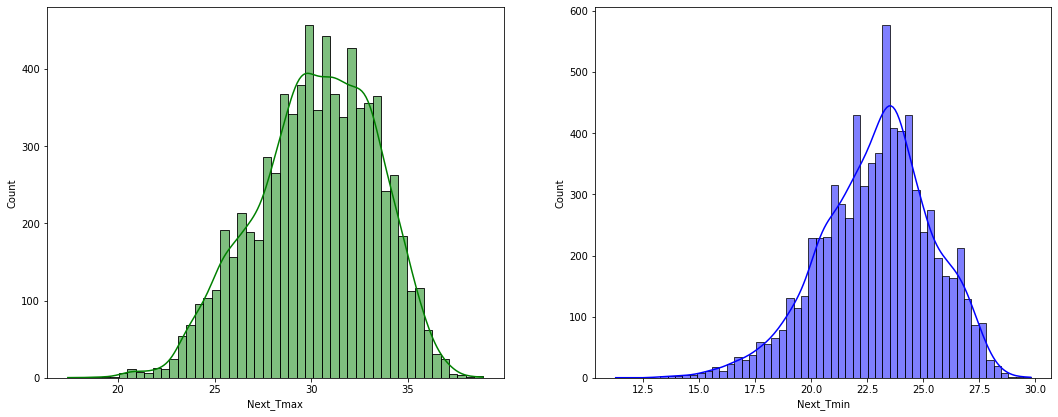

In [42]:
# first ploting the dist plot with next tmax and tmin

plt.figure(figsize=(18,15))
plt.subplot(2,2,1)
sns.histplot(df['Next_Tmax'],color='green',kde=True)
plt.subplot(2,2,2)
sns.histplot(df['Next_Tmin'],color='blue',kde=True)

as we can see that the majority of temperature is between 20 to 35 in max column and 15 ro 30 in min column

<AxesSubplot:title={'center':'station with next day min temp'}, xlabel='station', ylabel='Next_Tmin'>

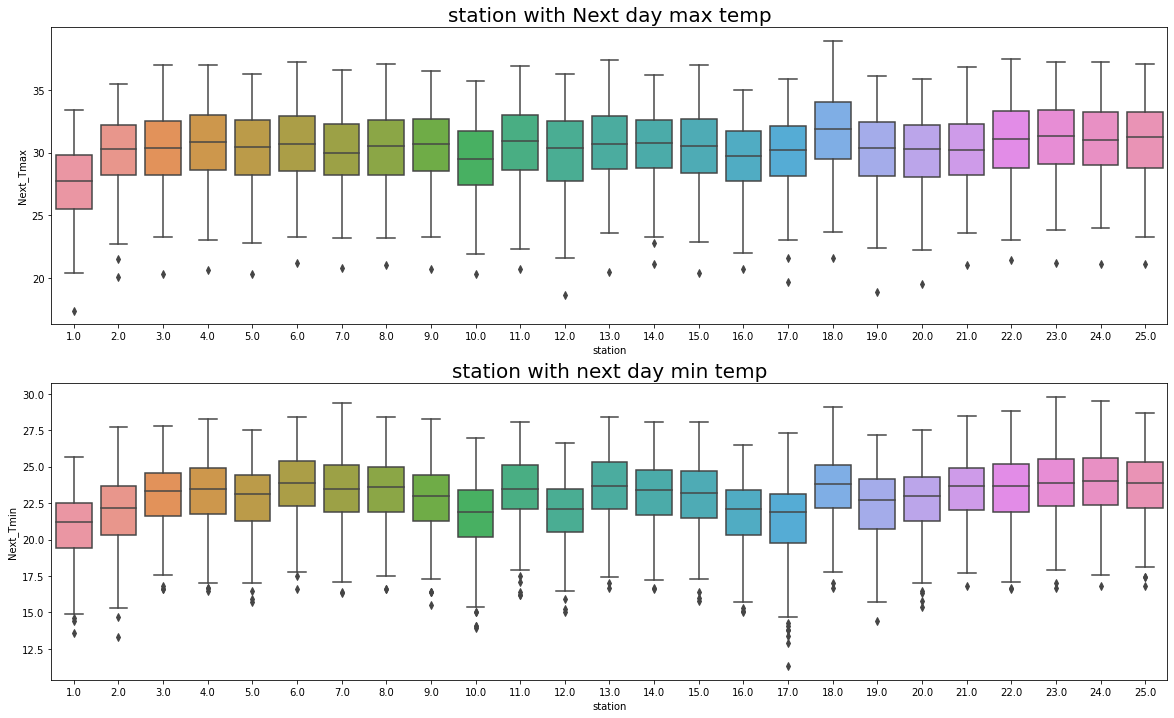

In [43]:
# plot the box plot with station and max, min temp

plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
plt.title("station with Next day max temp",fontsize=20)
sns.boxplot(x='station',y='Next_Tmax',data=df)

plt.subplot(2,1,2)
plt.title("station with next day min temp",fontsize=20)
sns.boxplot(x='station',y='Next_Tmin',data=df)

### Next min and max temp with cloud cover 

In [44]:
df.head(2)

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887  69.451805   0.233947   
1         29.850689         24.035009  5.691890  51.937448   0.225508   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   

   Next_Tmin  Day  Month  Year  
0       21.2   30      6  2013  
1       22.5   30      6  2013

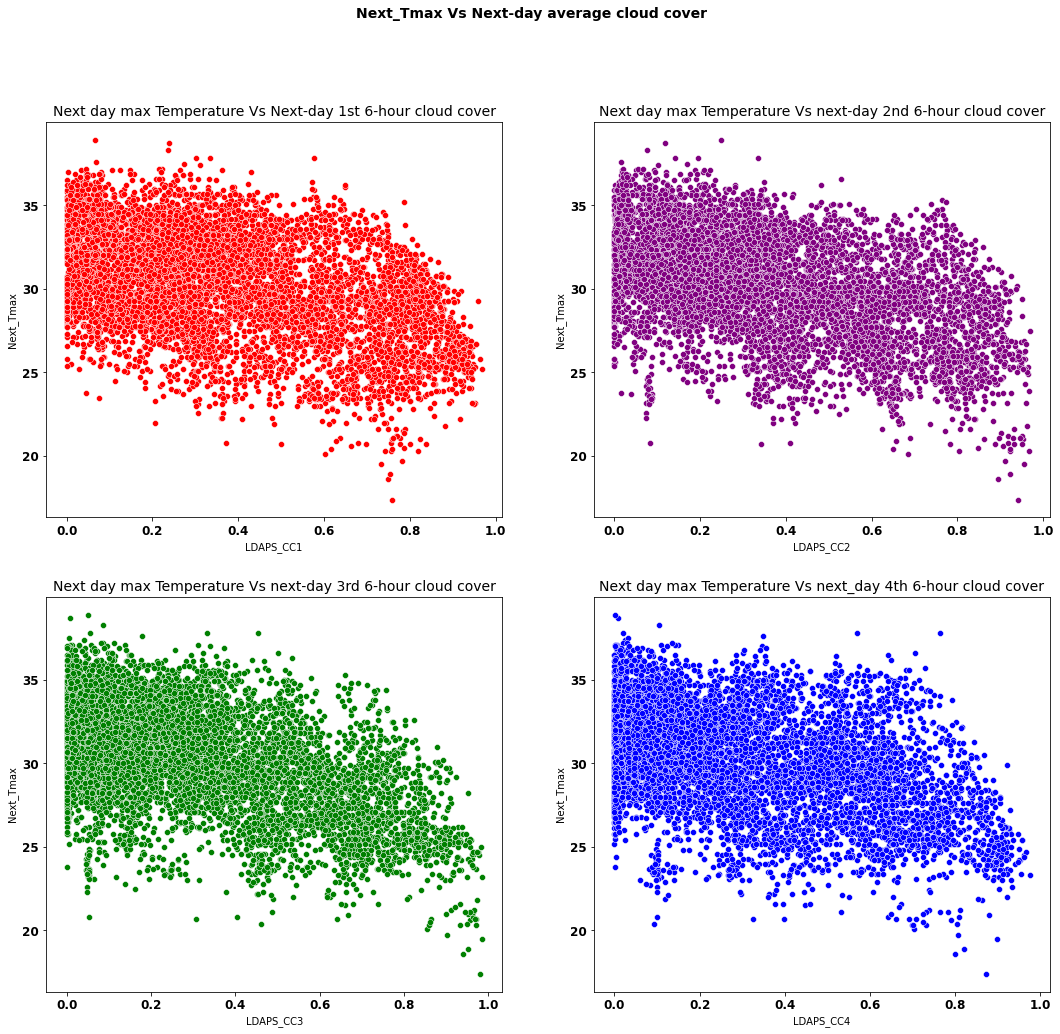

In [45]:
# Next_max with cloud cover 
plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmax Vs Next-day average cloud cover',fontsize=14, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=df,color="red")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=df,color='purple')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day max Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=df,color='green')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day max Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmax',data=df,color="blue")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

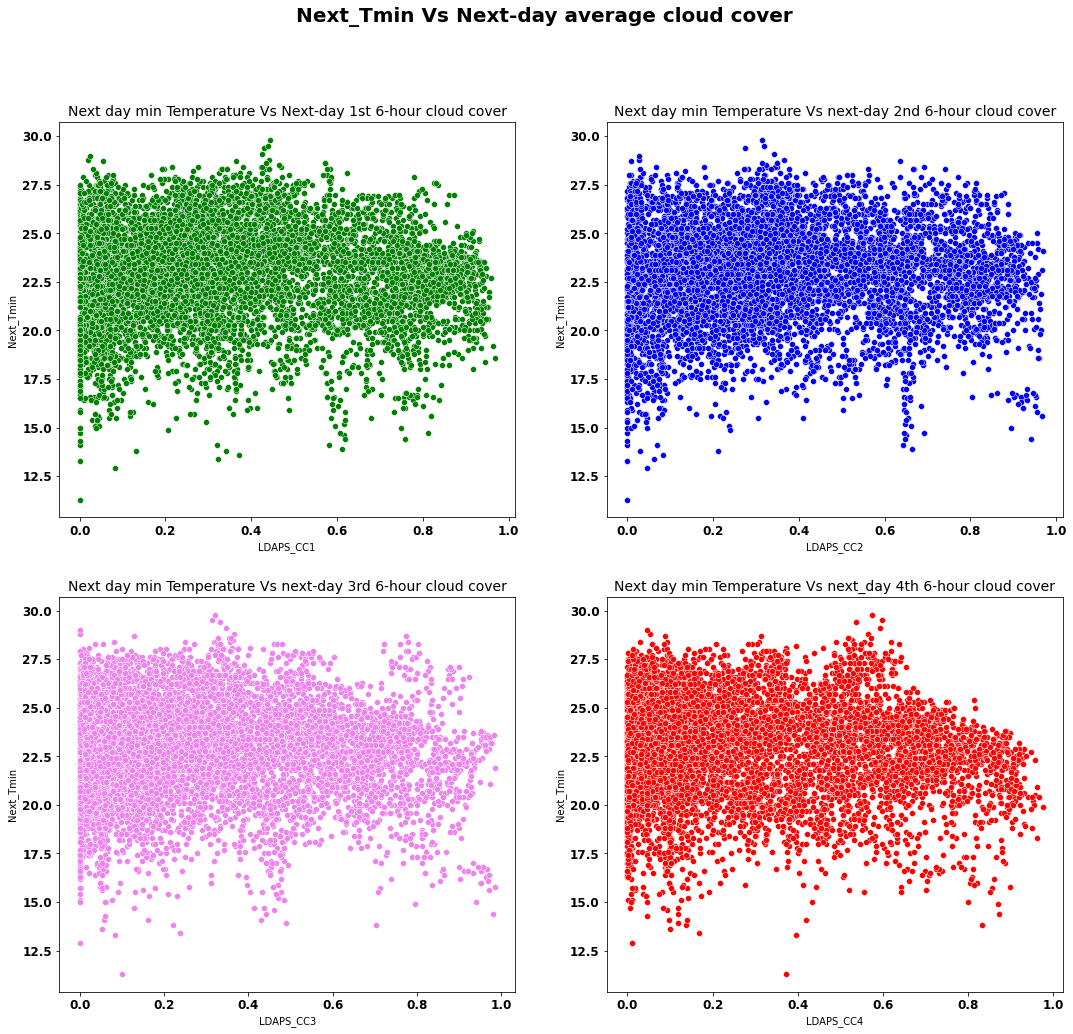

In [46]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmin Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day min Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmin',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

### Now its time to check solar radiation with cloud cover

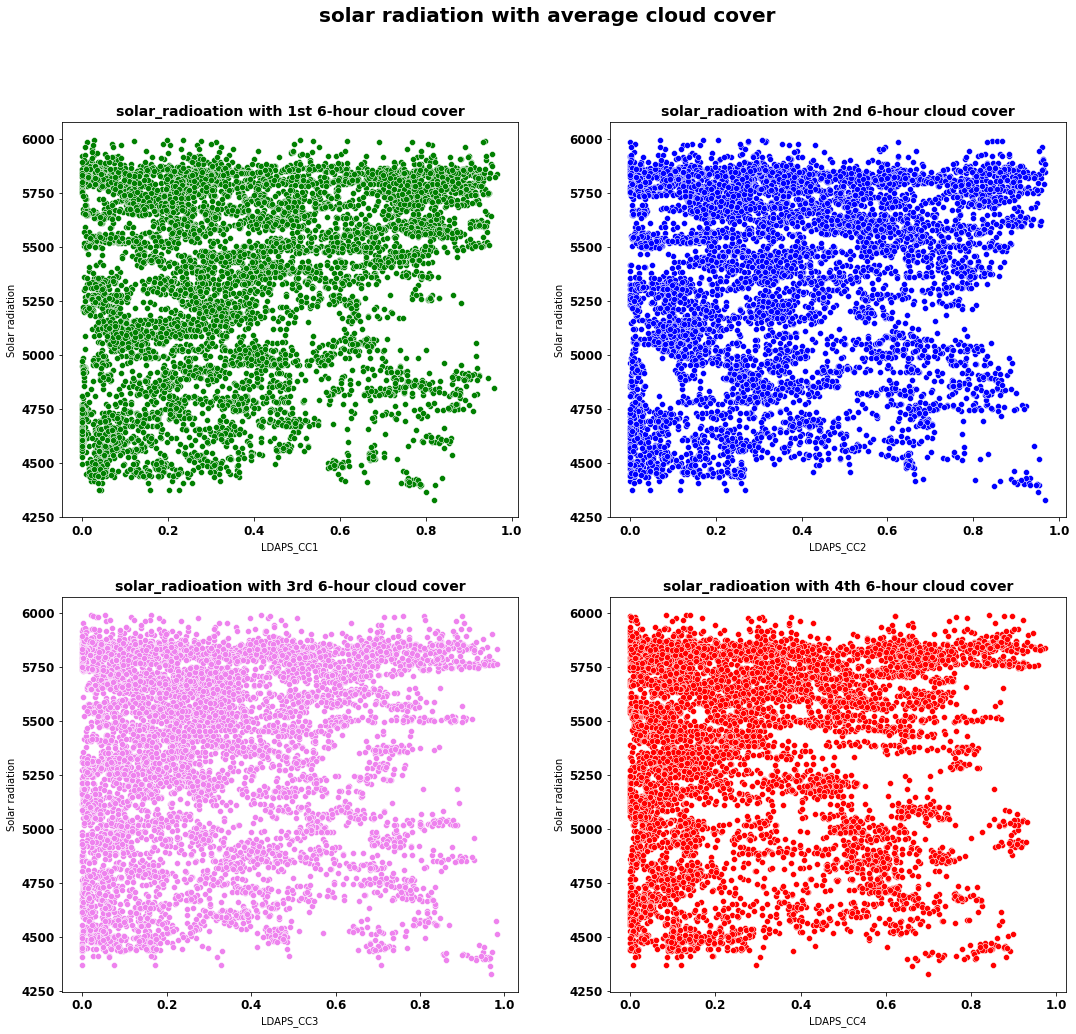

In [47]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('solar radiation with average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('solar_radioation with 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Solar radiation',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('solar_radioation with 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Solar radiation',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('solar_radioation with 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Solar radiation',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('solar_radioation with 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Solar radiation',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

In [48]:
df.head(2)

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887  69.451805   0.233947   
1         29.850689         24.035009  5.691890  51.937448   0.225508   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   

   Next_Tmin  Day  Month  Year  
0       21.2   30      6  2013  
1       22.5   30      6  2013

### solar radiation with relative humidity with max and min

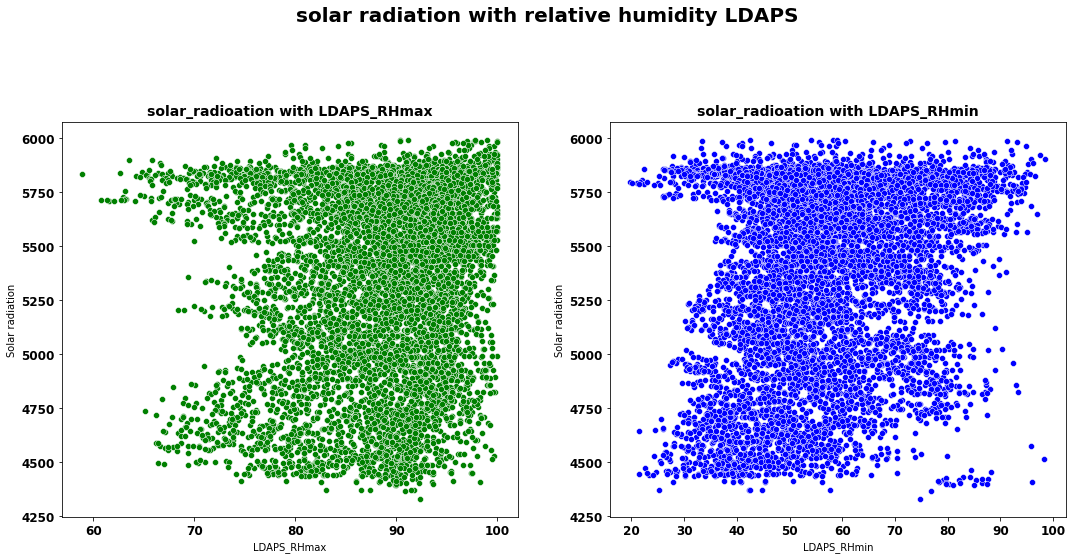

In [49]:
plt.figure(figsize=(18,16))
plt.suptitle('solar radiation with relative humidity LDAPS',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('solar_radioation with LDAPS_RHmax',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_RHmax',y='Solar radiation',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('solar_radioation with LDAPS_RHmin',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_RHmin',y='Solar radiation',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

### Precipitation VS Solar radiation

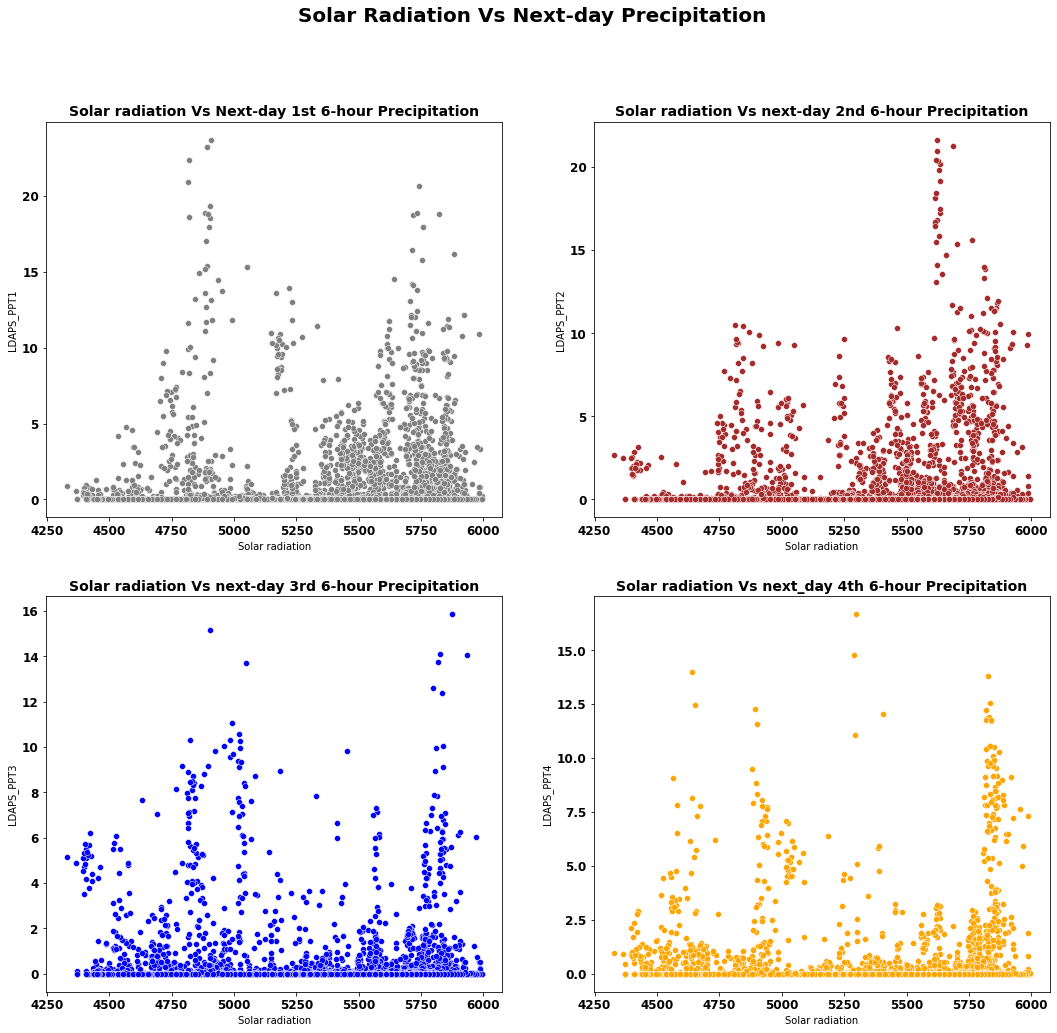

In [50]:

# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day Precipitation',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT1',x='Solar radiation',data=df,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT2',x='Solar radiation',data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT3',x='Solar radiation',data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT4',x='Solar radiation',data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

In [51]:
df.head(2)

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887  69.451805   0.233947   
1         29.850689         24.035009  5.691890  51.937448   0.225508   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   

   Next_Tmin  Day  Month  Year  
0       21.2   30      6  2013  
1       22.5   30      6  2013

###  wind speed with max and min

maximum wind speed is  21.85762099
minimum wind speed is  2.882579625


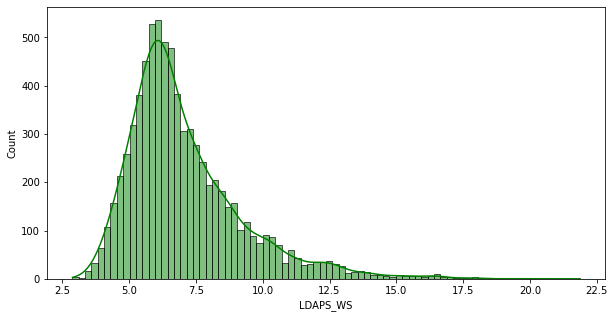

In [52]:
# first plot the hist plot of wind speed with max and min wind speed
plt.figure(figsize=(10,5))
sns.histplot(df['LDAPS_WS'],kde=True,color='green')
print("maximum wind speed is ",df['LDAPS_WS'].max())
print("minimum wind speed is ",df['LDAPS_WS'].min())


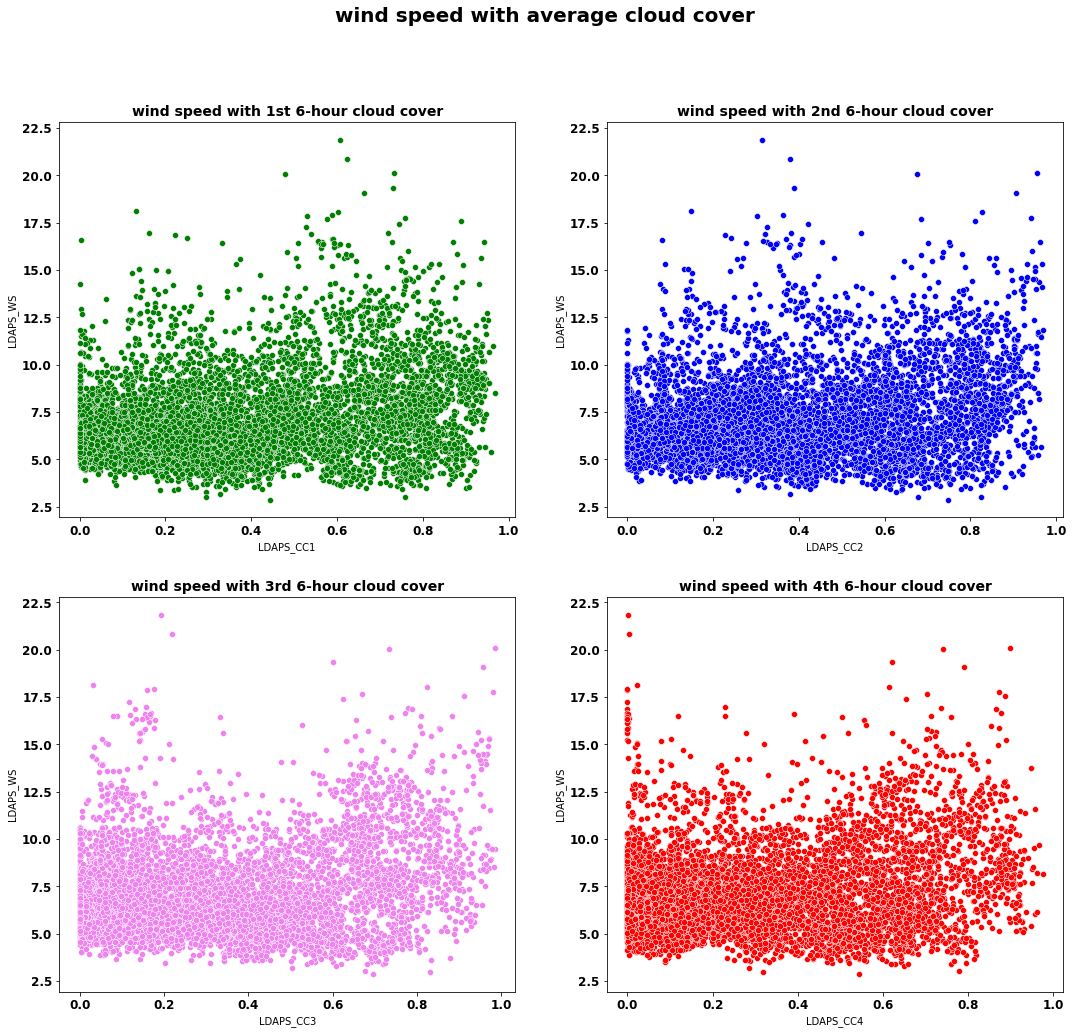

In [53]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('wind speed with average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('wind speed with 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='LDAPS_WS',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('wind speed with 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='LDAPS_WS',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('wind speed with 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='LDAPS_WS',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('wind speed with 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='LDAPS_WS',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

as we can see that there is more cloud coverage on which wind speed ranges are 5 to 10

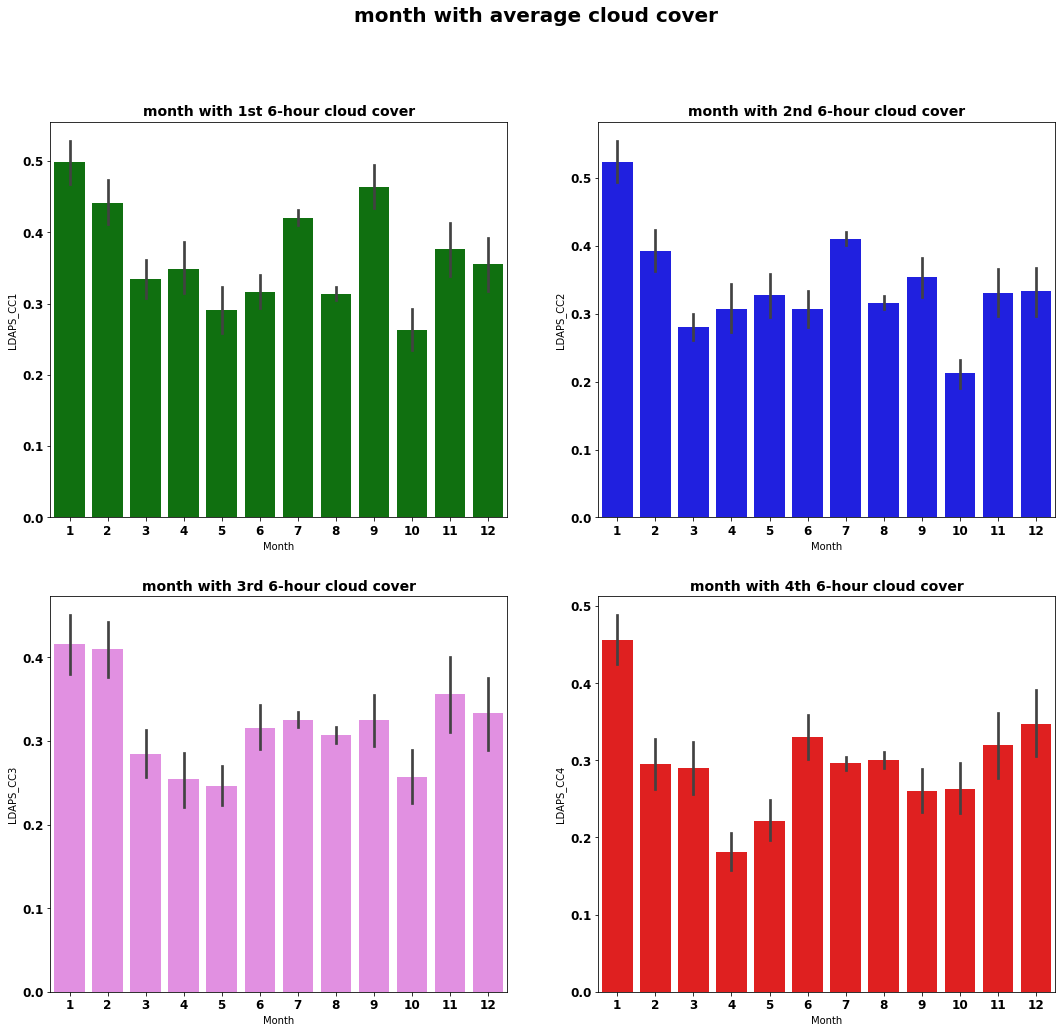

In [54]:
# now chekc month wise cloud coverage and then month wise percipitatin

plt.figure(figsize=(18,16))
plt.suptitle('month with average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('month with 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.barplot(y='LDAPS_CC1',x='Month',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('month with 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.barplot(y='LDAPS_CC2',x='Month',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('month with 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.barplot(y='LDAPS_CC3',x='Month',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('month with 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.barplot(y='LDAPS_CC4',x='Month',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()


In [55]:
df.head(2)

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887  69.451805   0.233947   
1         29.850689         24.035009  5.691890  51.937448   0.225508   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   

   Next_Tmin  Day  Month  Year  
0       21.2   30      6  2013  
1       22.5   30      6  2013

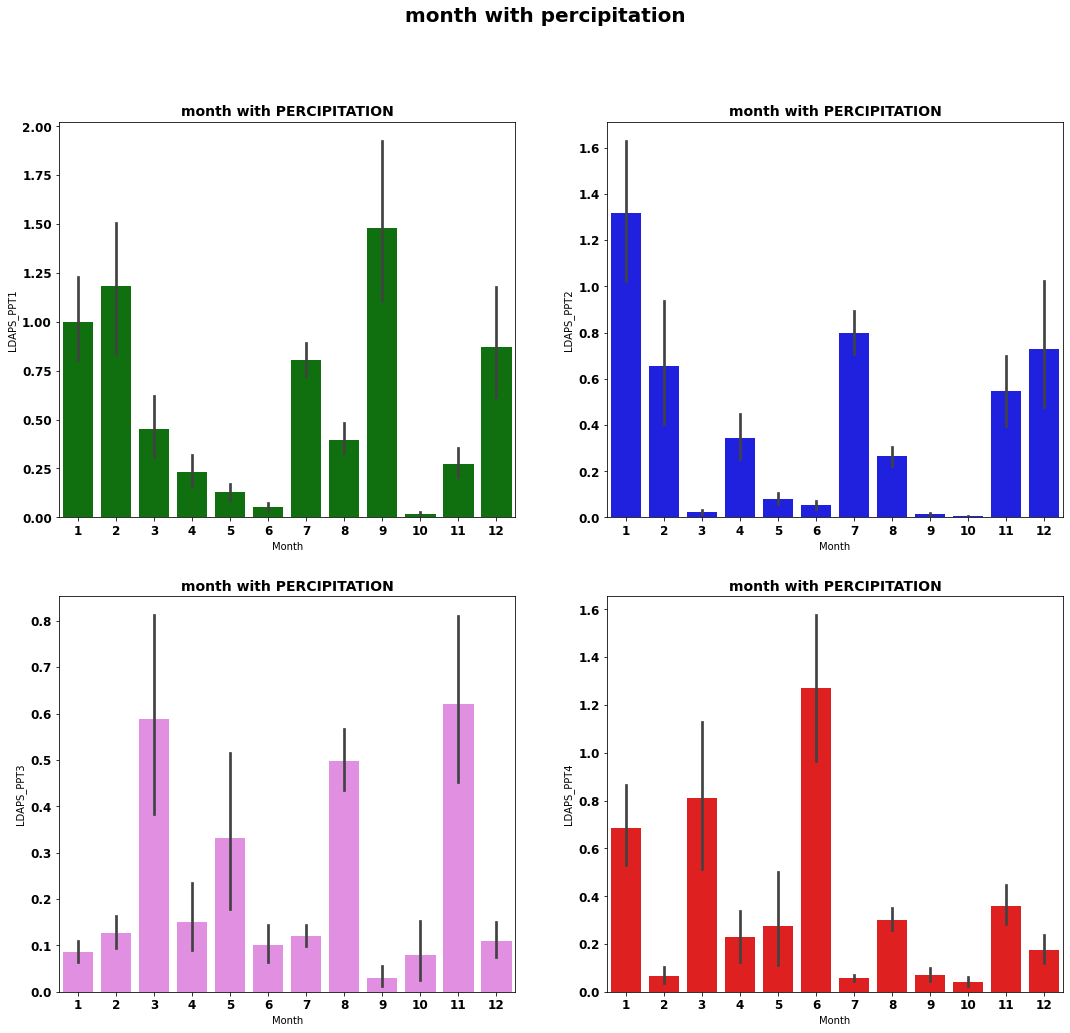

In [56]:
# now chek  month wise percipitatin

plt.figure(figsize=(18,16))
plt.suptitle('month with percipitation',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('month with PERCIPITATION',fontsize=14, fontweight='bold')
sns.barplot(y='LDAPS_PPT1',x='Month',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('month with PERCIPITATION',fontsize=14, fontweight='bold')
sns.barplot(y='LDAPS_PPT2',x='Month',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('month with PERCIPITATION',fontsize=14, fontweight='bold')
sns.barplot(y='LDAPS_PPT3',x='Month',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('month with PERCIPITATION',fontsize=14, fontweight='bold')
sns.barplot(y='LDAPS_PPT4',x='Month',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()


In [57]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.113301      0.133282    -0.067846   
Present_Tmax      0.113301      1.000000      0.615208    -0.209059   
Present_Tmin      0.133282      0.615208      1.000000     0.122200   
LDAPS_RHmin      -0.067846     -0.209059      0.122200     1.000000   
LDAPS_RHmax      -0.169351     -0.306943     -0.018576     0.578358   
LDAPS_Tmax_lapse  0.069856      0.573777      0.467904    -0.569580   
LDAPS_Tmin_lapse  0.105277      0.628705      0.772061     0.085237   
LDAPS_WS          0.005822     -0.125952     -0.038779     0.289422   
LDAPS_LH         -0.132129      0.134246     -0.012817    -0.072195   
LDAPS_CC1         0.006539     -0.316333      0.084348     0.612831   
LDAPS_CC2         0.003526     -0.216976      0.090038     0.744774   
LDAPS_CC3        -0.000161     -0.146391     -0.004719     0.688069   
LDAPS_CC4         0.005005     -0.143069     -0.046694     0.513937   
LDAPS_PPT1       -0.001954     -0.114917      0.111577     0.259039   
LDAPS_PPT2       -0.007635     -0.104779      0.066207     0.389572   
LDAPS_PPT3       -0.013865     -0.127248     -0.052428     0.237512   
LDAPS_PPT4       -0.011085     -0.107295     -0.070391     0.167311   
lat              -0.239118     -0.054134     -0.081417     0.085027   
lon              -0.118845      0.007695     -0.045174    -0.077590   
DEM              -0.256706     -0.189439     -0.254084     0.100684   
Slope            -0.091721     -0.107079     -0.148423     0.122454   
Solar radiation  -0.021194     -0.022114      0.059765     0.242168   
Next_Tmax         0.107747      0.610357      0.463523    -0.446824   
Next_Tmin         0.128184      0.621048      0.796975     0.093249   
Day              -0.000996     -0.154366     -0.115693    -0.063464   
Month             0.001211     -0.003266     -0.010210    -0.053499   
Year              0.001474      0.056002      0.037457    -0.002147   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.169351          0.069856          0.105277  0.005822   
Present_Tmax        -0.306943          0.573777          0.628705 -0.125952   
Present_Tmin        -0.018576          0.467904          0.772061 -0.038779   
LDAPS_RHmin          0.578358         -0.569580          0.085237  0.289422   
LDAPS_RHmax          1.000000         -0.377293         -0.118965  0.131269   
LDAPS_Tmax_lapse    -0.377293          1.000000          0.653425 -0.316011   
LDAPS_Tmin_lapse    -0.118965          0.653425          1.000000 -0.134652   
LDAPS_WS             0.131269         -0.316011         -0.134652  1.000000   
LDAPS_LH             0.238986          0.043663         -0.139675  0.004427   
LDAPS_CC1            0.435937         -0.440878          0.008714  0.285349   
LDAPS_CC2            0.390620         -0.525380          0.046537  0.257226   
LDAPS_CC3            0.224734         -0.542728         -0.044998  0.238155   
LDAPS_CC4            0.127242         -0.429739         -0.079536  0.218870   
LDAPS_PPT1           0.268019         -0.115659          0.034956  0.141503   
LDAPS_PPT2           0.227581         -0.248369         -0.002743  0.181634   
LDAPS_PPT3           0.132436         -0.193749         -0.093116  0.147199   
LDAPS_PPT4           0.118101         -0.170415         -0.103541  0.134428   
lat                  0.194820         -0.044052         -0.099452  0.033025   
lon                  0.025563          0.091568         -0.024703 -0.063009   
DEM                  0.176557         -0.181433         -0.198396  0.188540   
Slope                0.219436         -0.163891         -0.187864  0.169223   
Solar radiation      0.146622          0.047414          0.157763  0.120630   
Next_Tmax           -0.289788          0.835729          0.592119 -0.351107   
Next_Tmin           -0.076415          0.589963          0.886513 -0.102021   
Day                 -0.012226         -0.161320        

# Feature selection and Engineering

#### detection outliers and remove them

In [58]:
import warnings 
warnings.filterwarnings('ignore')

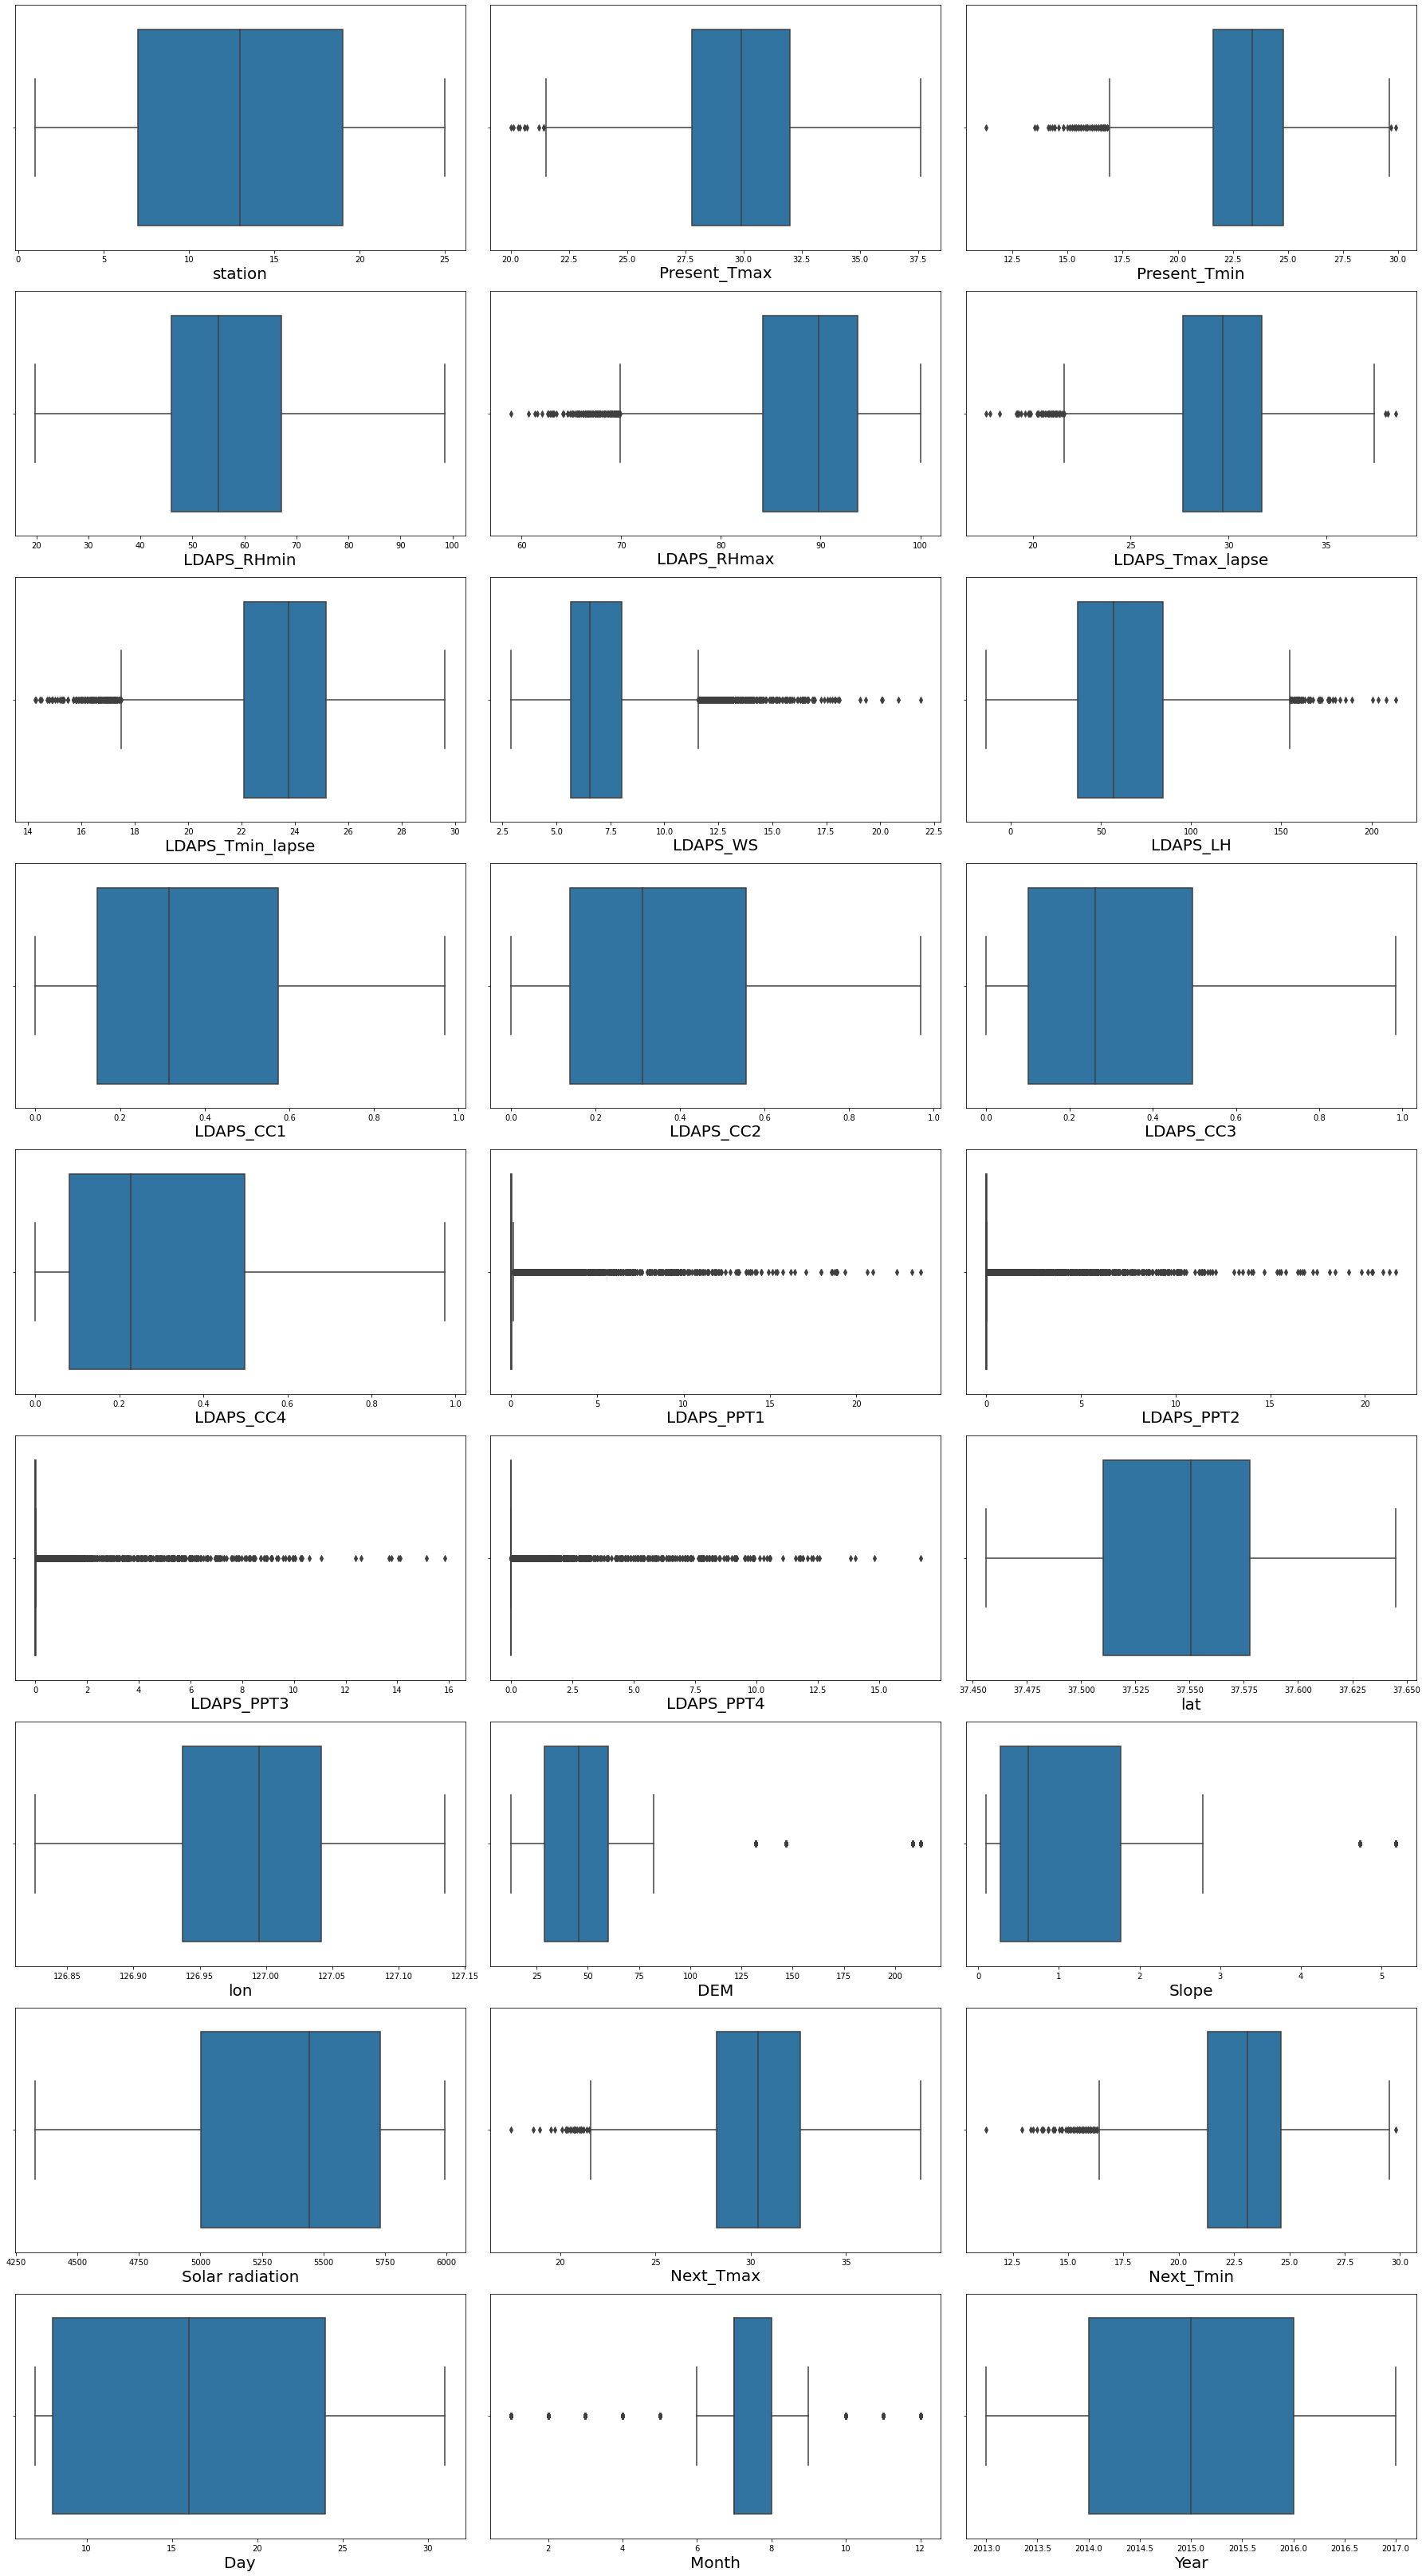

In [59]:
plt.figure(figsize=(25,45))
p=1
for i in df:
    if p<=27:
        plt.subplot(9,3,p)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=20)
    p+=1
plt.tight_layout()
plt.show()

In [60]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (7588, 27)
Shape of the dataframe after removing outliers:  (6739, 27)
Percentage of data loss post outlier removal:  11.188719030047443


as we can see that the data loss percentage is 11% but we can move further steps because its an huge dataset so its good to go

### now check for the skewness

In [61]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')

In [62]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.256528
Month              -0.680725
Year                0.025066
dtype: float64

In [63]:
from sklearn.preprocessing import PowerTransformer

In [64]:
pt=PowerTransformer(method='yeo-johnson')

In [65]:
skew=['LDAPS_RHmax','LDAPS_WS','LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','DEM', 'Slope','Month']

In [66]:
df[skew]=pt.fit_transform(df[skew].values)

In [67]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.103320
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            0.007615
LDAPS_LH           -0.030736
LDAPS_CC1           0.065308
LDAPS_CC2           0.050023
LDAPS_CC3           0.094449
LDAPS_CC4           0.142061
LDAPS_PPT1          1.617538
LDAPS_PPT2          1.820237
LDAPS_PPT3          1.995359
LDAPS_PPT4          2.267954
lat                 0.106983
lon                -0.277547
DEM                 0.038830
Slope               0.233799
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.256528
Month               0.039744
Year                0.025066
dtype: float64

In [68]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110291      0.133638    -0.069582   
Present_Tmax      0.110291      1.000000      0.610428    -0.154266   
Present_Tmin      0.133638      0.610428      1.000000     0.151385   
LDAPS_RHmin      -0.069582     -0.154266      0.151385     1.000000   
LDAPS_RHmax      -0.182354     -0.320074     -0.053421     0.566069   
LDAPS_Tmax_lapse  0.066863      0.540680      0.441577    -0.555583   
LDAPS_Tmin_lapse  0.104401      0.616886      0.764258     0.129481   
LDAPS_WS          0.030231     -0.071596      0.034364     0.171684   
LDAPS_LH         -0.135717      0.119022     -0.008556    -0.002412   
LDAPS_CC1         0.011902     -0.286862      0.104457     0.580343   
LDAPS_CC2         0.007471     -0.163730      0.122647     0.703523   
LDAPS_CC3         0.006303     -0.061417      0.043629     0.636195   
LDAPS_CC4         0.011510     -0.049978      0.000193     0.459528   
LDAPS_PPT1       -0.001774     -0.190222      0.068506     0.410985   
LDAPS_PPT2       -0.006798     -0.097425      0.090113     0.510241   
LDAPS_PPT3       -0.004884     -0.022348      0.035889     0.405612   
LDAPS_PPT4       -0.000285     -0.021344     -0.063495     0.244139   
lat              -0.241811     -0.052041     -0.072707     0.090054   
lon              -0.122829      0.011132     -0.043201    -0.093969   
DEM              -0.326019     -0.130892     -0.238916     0.057460   
Slope            -0.146034     -0.092409     -0.157839     0.083910   
Solar radiation  -0.032810     -0.059891      0.020030     0.251733   
Next_Tmax         0.106378      0.586943      0.438813    -0.433872   
Next_Tmin         0.129110      0.615950      0.785946     0.134518   
Day               0.005179     -0.136914     -0.076877    -0.070194   
Month             0.003494      0.039443     -0.019387    -0.070498   
Year              0.006658      0.099185      0.099222     0.001709   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.182354          0.066863          0.104401  0.030231   
Present_Tmax        -0.320074          0.540680          0.616886 -0.071596   
Present_Tmin        -0.053421          0.441577          0.764258  0.034364   
LDAPS_RHmin          0.566069         -0.555583          0.129481  0.171684   
LDAPS_RHmax          1.000000         -0.403634         -0.163219  0.060965   
LDAPS_Tmax_lapse    -0.403634          1.000000          0.621299 -0.154400   
LDAPS_Tmin_lapse    -0.163219          0.621299          1.000000 -0.011333   
LDAPS_WS             0.060965         -0.154400         -0.011333  1.000000   
LDAPS_LH             0.285942          0.005878         -0.141554 -0.056362   
LDAPS_CC1            0.415436         -0.404350          0.074850  0.189345   
LDAPS_CC2            0.364388         -0.482949          0.116169  0.148004   
LDAPS_CC3            0.143375         -0.468317          0.043415  0.065764   
LDAPS_CC4            0.046555         -0.367547         -0.009851  0.090955   
LDAPS_PPT1           0.420202         -0.307565         -0.043196  0.197126   
LDAPS_PPT2           0.368154         -0.344808          0.033613  0.166155   
LDAPS_PPT3           0.219383         -0.285371         -0.018835  0.089355   
LDAPS_PPT4           0.118163         -0.207369         -0.086548  0.167950   
lat                  0.232258         -0.038285         -0.090587 -0.027463   
lon                  0.013059          0.106354         -0.024177 -0.077686   
DEM                  0.174176         -0.110286         -0.169881  0.113157   
Slope                0.209222         -0.105094         -0.156322  0.095385   
Solar radiation      0.164931          0.012974          0.106033  0.148098   
Next_Tmax           -0.323446          0.816861          0.546479 -0.205979   
Next_Tmin           -0.110402          0.553227          0.875382  0.023330   
Day                 -0.009056         -0.140514        

<AxesSubplot:>

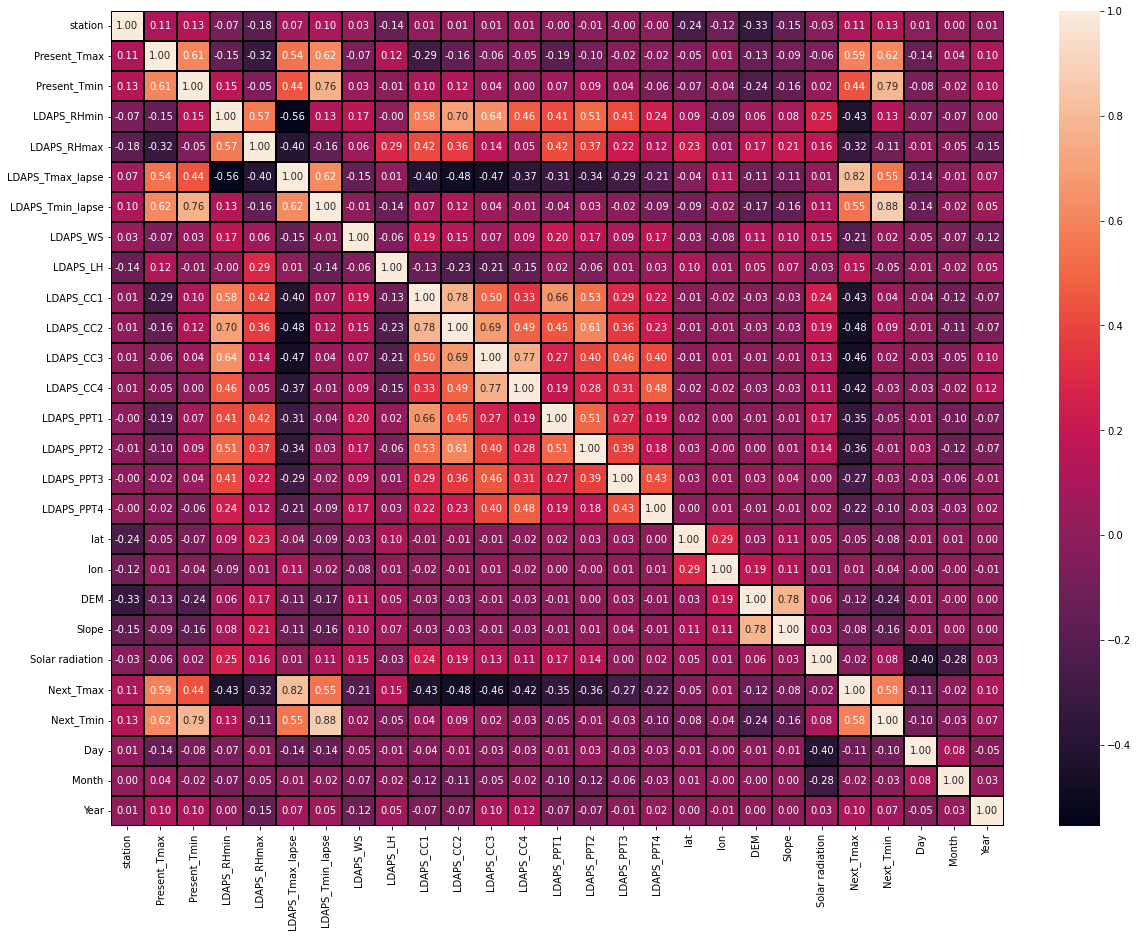

In [69]:
# we can plot the cor relation plot 
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.01,linecolor='black')

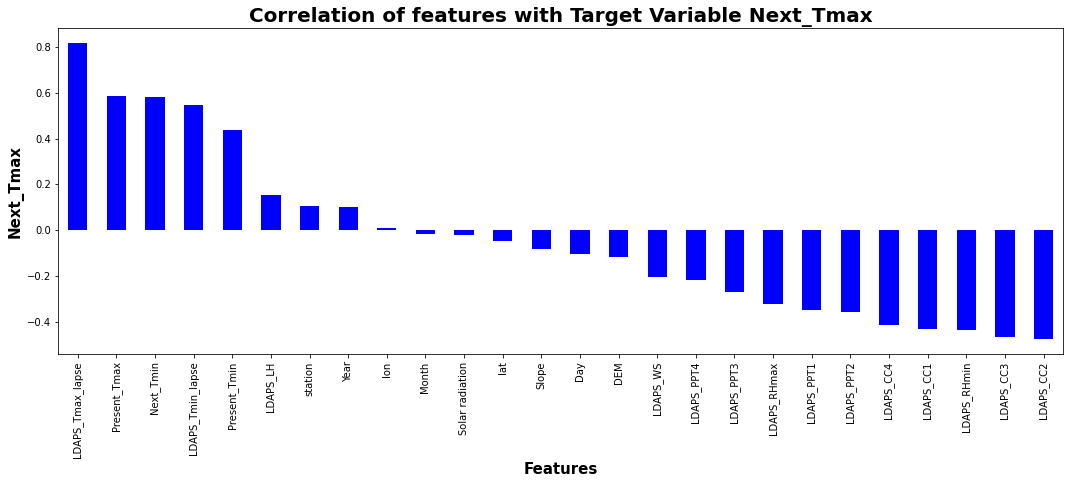

In [70]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending=False).plot(kind='bar',color = 'blue')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmax',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmax',fontsize = 20,fontweight='bold')
plt.show()

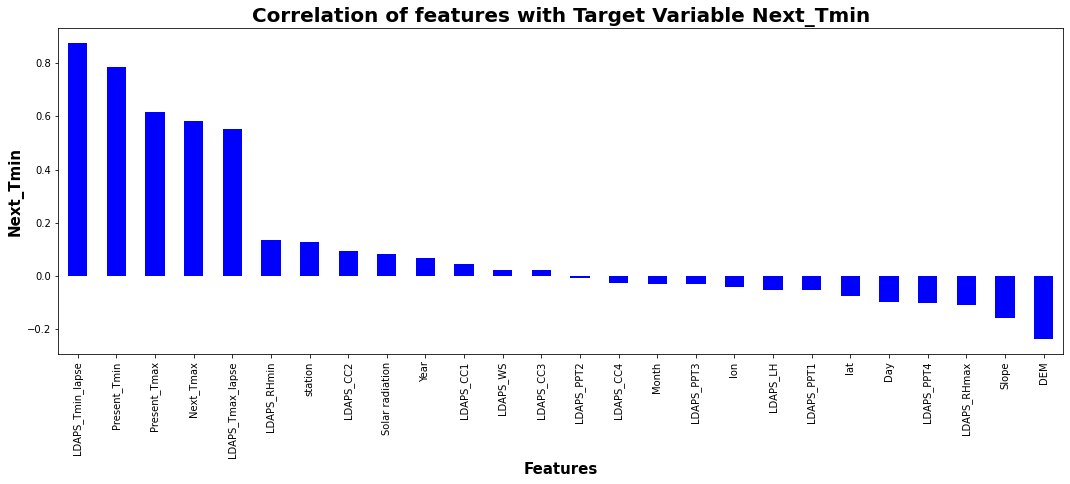

In [71]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmin'].drop(['Next_Tmin']).sort_values(ascending=False).plot(kind='bar',color = 'blue')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmin',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmin',fontsize = 20,fontweight='bold')
plt.show()

###  there have  two target variable so first we can build the regression model on Next_Tmax after we go on Next_Tmin

#### Standard Scaling 

In [72]:
# # Splitting data in target and dependent feature
X = df.drop(['Next_Tmax'], axis =1)
Y = df['Next_Tmax']

In [73]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

##### Checking Multicollinearity between features using variance_inflation_factor

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values          Features
0     1.290805           station
1     2.880579      Present_Tmax
2     3.361922      Present_Tmin
3     6.130950       LDAPS_RHmin
4     2.604690       LDAPS_RHmax
5     7.055352  LDAPS_Tmax_lapse
6     8.823786  LDAPS_Tmin_lapse
7     1.220461          LDAPS_WS
8     1.501935          LDAPS_LH
9     4.429361         LDAPS_CC1
10    5.174197         LDAPS_CC2
11    4.589378         LDAPS_CC3
12    2.794837         LDAPS_CC4
13    2.230731        LDAPS_PPT1
14    1.970517        LDAPS_PPT2
15    1.598335        LDAPS_PPT3
16    1.607240        LDAPS_PPT4
17    1.297893               lat
18    1.225630               lon
19    3.389973               DEM
20    2.876589             Slope
21    1.511861   Solar radiation
22    5.705228         Next_Tmin
23    1.275065               Day
24    1.123839             Month
25    1.135207              Year

as we can see the multicolinearity is in range so we can go to further steps

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from sklearn.ensemble import BaggingRegressor


### finding best random state for the model

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.20)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8152232376322331 on Random_state 499


### Linear Regression

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=maxRS, test_size=.20)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [26.98382287 26.08873249 35.5199912  ... 32.27843332 28.8537911
 25.01519375]


Actual Wins:
 7627    26.5
3516    28.7
5553    35.2
5182    34.1
4684    26.3
        ... 
7601    28.4
3745    30.2
854     33.0
4594    29.5
4758    25.9
Name: Next_Tmax, Length: 1348, dtype: float64


In [78]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.9894392682511384
Mean squared error : 1.6472164699688756
Root Mean Squared Error: 1.2834393129279138


 R2 Score :
0.8152232376322331


In [79]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.6712713585773495


In [80]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())


rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()

model = [rf,XT,dtc,adb,gradb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('*'*100)

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.6712713585773495


 Error of  RandomForestRegressor() :
Mean absolute error : 0.6565452522255188
Mean squared error : 0.7564704310089022
Root Mean Squared Error: 0.8697530862313179


 R2 Score :
0.9151428123642941
****************************************************************************************************


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.5651461424332341
Mean squared error : 0.5690195126112757
Root Mean Squared Error: 0.7543338204079648


 R2 Score :
0.9361701481370066
****************************************************************************************************


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.9957715133531155
Mean squared error : 1.8398293768545988
Root Mean Squared Error: 1.3564031026411725


 R2 Score :
0.7936168550022316
****************************************************************************************************


 Error of  AdaBoostRegre

###  it is easier to make a loop to do all the modeling steps

In [81]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb]

for m in model:
    mse = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",mse.mean())
    #print("Std deviation :",score.std())
    print("*"*100)



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.6842924207096782
****************************************************************************************************


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.694042552870064
****************************************************************************************************


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.4204701364963923
****************************************************************************************************


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.6449016884913481
****************************************************************************************************


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.7059207600141726
****************************************************************************************************


### Hyper Parameter Tuning : GridSearchCV

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
ExtraTreesRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [84]:
param_grid ={
    'n_estimators': [10,50,100],
    'criterion': ['mse'],
    'min_samples_leaf': [1,2],
    #'oob_score': [True, False],
    'max_features': ['auto','sqrt','log2'],    
    }

#params_rf = {
#             'n_estimators': [100, 350, 500],
#             'max_features': ['log2', 'auto', 'sqrt'],
#             'min_samples_leaf': [2, 10, 30], 
#             }

In [85]:
#model=GridSearchCV(ExtraTreesRegressor(),param_grid=params_rf,scoring='neg_mean_squared_error',cv=3,verbose=1,n_jobs=-1)
gcv = GridSearchCV(ExtraTreesRegressor(),param_grid=param_grid,cv=5,n_jobs=-1)

In [86]:
gcv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [10, 50, 100]})

In [88]:
gcv.best_params_

{'criterion': 'mse',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

## Final model

In [89]:
Final_mod =  RandomForestRegressor(criterion='mse',max_features='auto',min_samples_leaf= 1,n_estimators=100 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.6528686943620178
Mean squared error : 0.748417647626113
Root Mean Squared Error: 0.8651113498423847


 R2 Score of Final Model :
0.9160461345861444




 True Values Vs Predicted Value plot :


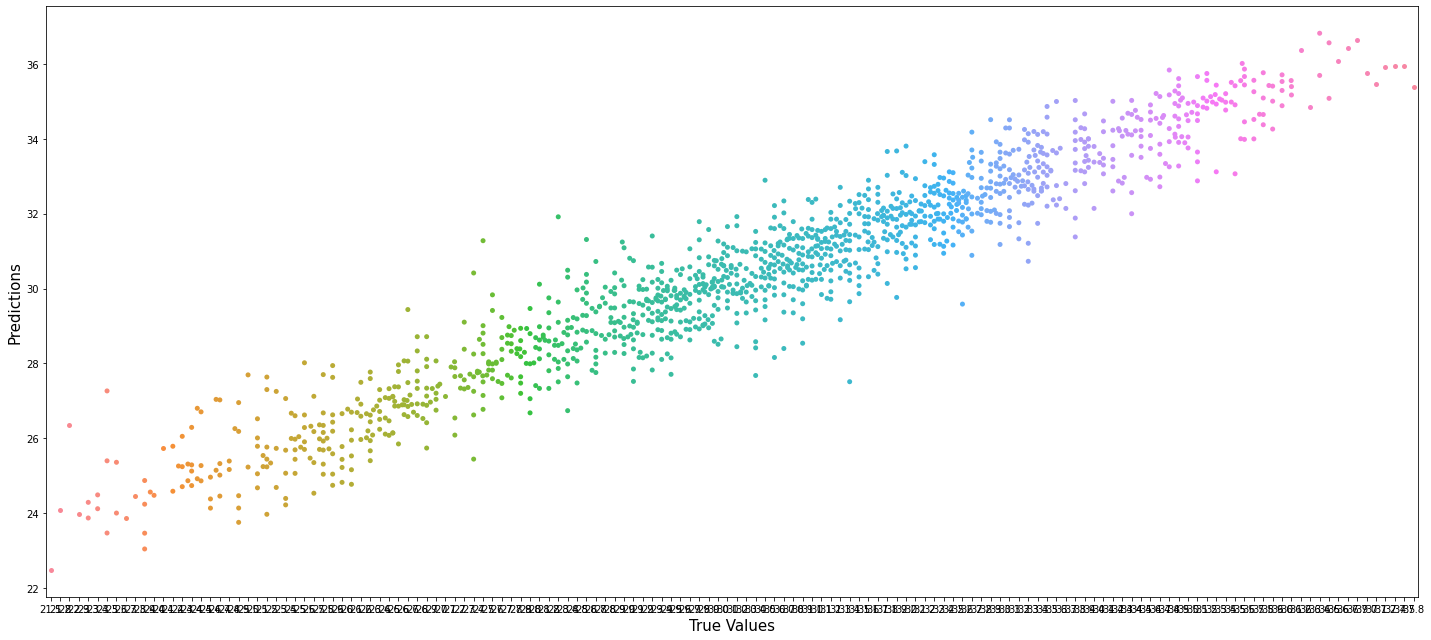

In [90]:
plt.figure(figsize=(20,9))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

## Final Regression Saving Model

In [91]:
import joblib
joblib.dump(Final_mod,'Next_Tmax_Forecast_Final.pkl')

['Next_Tmax_Forecast_Final.pkl']

###  its time to Next_Tmin_forecast model building

##### same steps done for this also as we can import all libarires so se can seprate the features and variables and move to modeling steps

In [92]:
X=df.drop('Next_Tmin',axis=1)
Y=df['Next_Tmin']

In [93]:
X_new_scale=pd.DataFrame(scaler.fit_transform(X.values),columns=X.columns)

In [94]:
X_new_scale

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.672719     -0.425704     -0.814460     0.195915     0.348222   
1    -1.533959      0.690215     -0.727785    -0.236604     0.261118   
2    -1.395198      0.585598      0.008945    -0.494494    -0.717348   
3    -1.256438      0.725088      0.052282     0.194767     1.375094   
4    -1.117678      0.515853     -0.597774     0.045667     0.186035   
...        ...           ...           ...          ...          ...   
6734  1.102482     -2.378563     -2.374595    -2.226900    -1.363447   
6735  1.241243     -2.587798     -2.547943    -1.836710    -0.753410   
6736  1.380003     -2.308818     -2.677955    -2.078766    -1.302260   
6737  1.518763     -2.308818     -2.417932    -2.273699    -1.457152   
6738  1.657523     -2.343691     -2.547943    -2.353646    -1.462002   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
0            -0.662498         -0.289928  0.176871  0.349992  -0.307447   
1            -0.016693          0.171379 -0.574617 -0.166810  -0.348674   
2             0.070769          0.409475 -0.252083 -1.378337  -0.429256   
3            -0.069787         -0.146681 -0.606795  0.245926  -0.393954   
4            -0.284509         -0.074752 -0.541825  1.298111  -0.736780   
...                ...               ...       ...       ...        ...   
6734         -0.757521         -2.400625  0.048293 -2.013062  -1.337812   
6735         -1.160213         -2.620034 -0.516916  0.685720  -1.248452   
6736         -1.288468         -2.188536 -0.244791  0.421213  -1.493884   
6737         -1.049238         -2.207453  0.011101 -0.319269  -1.453370   
6738         -0.711421         -2.301931  0.436829 -2.050229  -1.364272   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0     -0.425528  -0.460839  -0.512476    -0.52537   -0.484794   -0.461889   
1     -0.192022  -0.474101  -0.532674    -0.52537   -0.484794   -0.461889   
2     -0.165290  -0.222547  -0.443077    -0.52537   -0.484794   -0.461889   
3     -0.315683  -0.464009  -0.491694    -0.52537   -0.484794   -0.461889   
4     -0.200399  -0.361649  -0.278264    -0.52537   -0.484794   -0.461889   
...         ...        ...        ...         ...         ...         ...   
6734  -1.433488  -1.603486  -1.453999    -0.52537   -0.484794   -0.461889   
6735  -1.471366  -1.603481  -1.339338    -0.52537   -0.484794   -0.461889   
6736  -1.108477  -1.603486  -1.492710    -0.52537   -0.484794   -0.461889   
6737  -1.145833  -1.603486  -1.492710    -0.52537   -0.484794   -0.461889   
6738  -1.240336  -1.603486  -1.485638    -0.52537   -0.484794   -0.461889   

      LDAPS_PPT4       lat       lon       DEM     Slope  Solar radiation  \
0      -0.414444  1.211166  0.002925  1.854393  1.327776         1.543068   
1      -0.414444  1.211166  0.518733  0.069704 -0.375858         1.249502   
2      -0.414444  0.671467  0.845830 -0.353433 -0.944115         1.235827   
3      -0.414444  2.018714  0.392926  0.098766  1.249133         1.220170   
4      -0.414444  0.133768  1.814542 -0.278815 -0.392364         1.226317   
...          ...       ...       ...       ...       ...              ...   
6734   -0.414444  0.133768  0.619378 -0.712912 -0.269357        -2.107693   
6735   -0.414444 -0.675779  1.198089 -0.999559 -1.353609        -2.141474   
6736   -0.414444 -0.136081 -1.255142 -1.576584 -1.278502        -2.137886   
6737   -0.414444 -0.405930 -1.028689 -1.397502 -1.069018        -2.149622   
6738   -0.414444 -0.405930 -0.261269 -1.188213 -0.929871        -2.118808   

      Next_Tmax       Day     Month      Year  
0     -0.489951  1.674045 -0.575810 -1.421473  
1     -0.011135  1.674045 -0.575810 -1.421473  
2      0.194072  1.674045 -0.575810 -1.421473  
3      0.399279  1.674045 -0.575810 -1.421473  
4      0.228274  1.674045 -0.575810 -1.421473  
...         ...       ...       ...       ...  
6734  -1.002969  1.674045  0.364102  1.442938  
6735  -

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_new_scale, Y, random_state=i, test_size=.20)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8565753228865434 on Random_state 479


# Linear Regression

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new_scale, Y, random_state=maxRS, test_size=.20)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)


print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

Predicted Wins:
 [21.08776453 18.86251961 23.81909586 ... 22.46677379 24.75988267
 26.57879911]


Actual Wins:
 7586    21.4
6099    19.1
6646    23.7
73      20.6
855     26.3
        ... 
2261    21.4
5192    26.2
5144    23.0
6414    23.5
5539    26.9
Name: Next_Tmin, Length: 1348, dtype: float64
 Error :
Mean absolute error : 0.7354319276934087
Mean squared error : 0.8685828957311797
Root Mean Squared Error: 0.9319779480927538


 R2 Score :
0.8565753228865434


In [97]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_new_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7884088929918809


In [98]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()

model = [rf,XT,dtc,adb,gradb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('*'*100)
    
    
    
    




 Error of  RandomForestRegressor() :
Mean absolute error : 0.5642232937685462
Mean squared error : 0.5393141787833831
Root Mean Squared Error: 0.7343801323452201


 R2 Score :
0.9109457918928957
****************************************************************************************************


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.5207856083086058
Mean squared error : 0.4695275600890215
Root Mean Squared Error: 0.6852208111908318


 R2 Score :
0.9224693013958695
****************************************************************************************************


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.8211424332344215
Mean squared error : 1.2346364985163205
Root Mean Squared Error: 1.111141979459115


 R2 Score :
0.7961307527209284
****************************************************************************************************


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.8488305131580485
Mean squared error : 1.1045658702

In [99]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb]

for m in model:
    mse = cross_val_score(m, X_new_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",mse.mean())
    #print("Std deviation :",score.std())
    print("*"*100)



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.7932346952135793
****************************************************************************************************


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.7985405433524767
****************************************************************************************************


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.5958077222550493
****************************************************************************************************


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.7469279423881587
****************************************************************************************************


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.8030496805808417
****************************************************************************************************


In [102]:
param_grid ={
    'n_estimators': [10,50,100],
    'criterion': ['mse'],
    'min_samples_leaf': [1,2],
    #'oob_score': [True, False],
    'max_features': ['auto','sqrt','log2'],    
    }


model_new=GridSearchCV(ExtraTreesRegressor(),param_grid=param_grid,cv=5,verbose=1,n_jobs=-1)




In [104]:
model_new.fit(X_train,Y_train)

model_new.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'criterion': 'mse',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 100}

#  Final model for Next_Tmin

In [105]:
Final_mod =  ExtraTreesRegressor(criterion='mse',max_features='sqrt',min_samples_leaf= 1,n_estimators=100 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')





 Error in Final Model :
Mean absolute error : 0.5041253709198813
Mean squared error : 0.4473451624629079
Root Mean Squared Error: 0.6688386669914561


 R2 Score of Final Model :
0.9261321679256662




 True Values Vs Predicted Value plot :


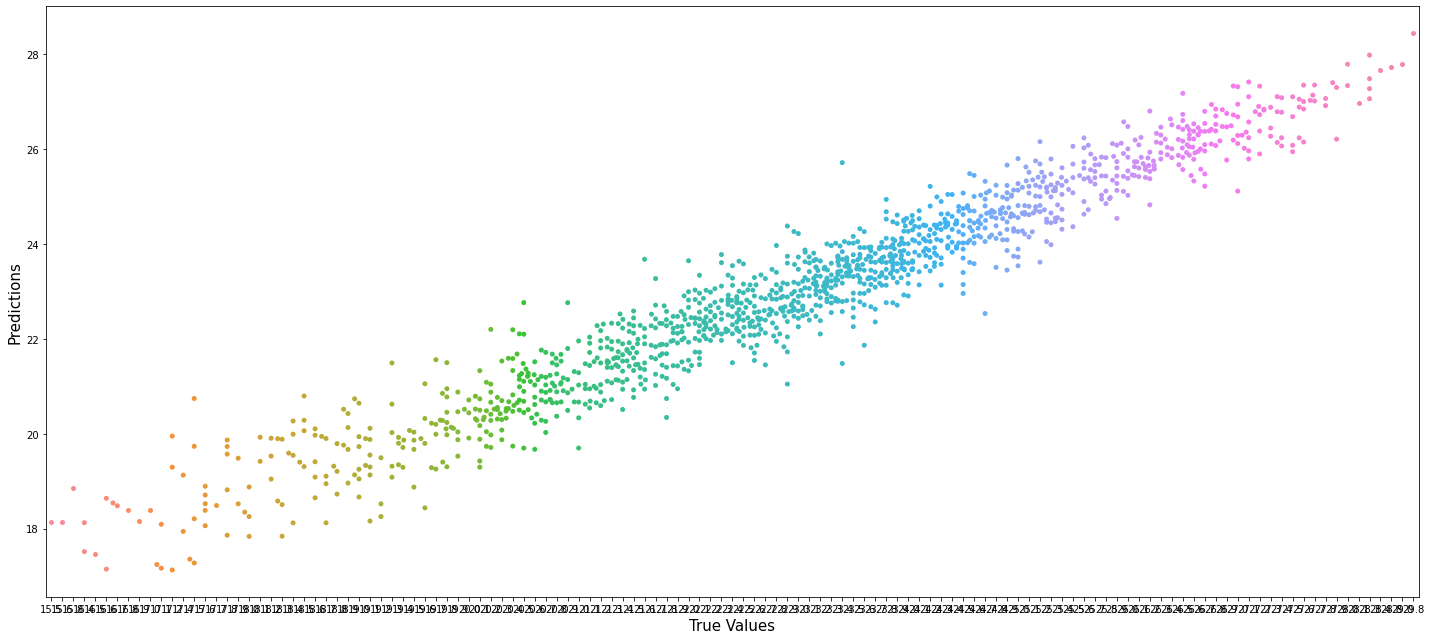

In [106]:
plt.figure(figsize=(20,9))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

### Saving model

In [107]:
joblib.dump(Final_mod,'Next_Tmin_Final.pkl')

['Next_Tmin_Final.pkl']